In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from statistics import median

In [165]:
table = pd.read_excel('05.22.xlsx')

# Общая оценка

Размеры датасета

In [166]:
table.head()

,Почта_Sigma,Должность,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Подразделение_3,Подразделение_4
0,1,Ведущий инженер по сопровождению,нет перехода по ссылке,нет ввода данных,NaN,"Блок ""Технологии""",1.0
1,2,Руководитель направления,нет перехода по ссылке,нет ввода данных,NaN,"Блок ""Технологии""",1.0
2,3,Руководитель направления,нет перехода по ссылке,нет ввода данных,NaN,"Блок ""Риски""",2.0
3,4,Исполнительный директор,есть переход по ссылке,нет ввода данных,NaN,"Блок ""Технологии""",3.0
4,5,Исполнительный директор,нет перехода по ссылке,нет ввода данных,NaN,"Блок ""Технологии""",4.0


In [167]:
print(table.shape)
print(len(table))

(44466, 7)
44466


Уникальные значения в столбцах

In [168]:
table['Сообщение_в_ЦПКБ'] = table['Сообщение_в_ЦПКБ'].fillna('нет')
table.head()

,Почта_Sigma,Должность,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Подразделение_3,Подразделение_4
0,1,Ведущий инженер по сопровождению,нет перехода по ссылке,нет ввода данных,нет,"Блок ""Технологии""",1.0
1,2,Руководитель направления,нет перехода по ссылке,нет ввода данных,нет,"Блок ""Технологии""",1.0
2,3,Руководитель направления,нет перехода по ссылке,нет ввода данных,нет,"Блок ""Риски""",2.0
3,4,Исполнительный директор,есть переход по ссылке,нет ввода данных,нет,"Блок ""Технологии""",3.0
4,5,Исполнительный директор,нет перехода по ссылке,нет ввода данных,нет,"Блок ""Технологии""",4.0


In [169]:
table['Переход_по_ссылке'].unique()

array(['нет перехода по ссылке', 'есть переход по ссылке'], dtype=object)

In [170]:
table['Ввод_данных'].unique()

array(['нет ввода данных', 'есть ввод данных'], dtype=object)

In [171]:
table['Сообщение_в_ЦПКБ'].unique()

array(['нет', 'есть'], dtype=object)

Заменяем длинные сообщения на численные эквиваленты

In [172]:
def change_data(msg: str) -> str:
    return 1 if msg.split()[0] == 'есть' else 0

In [173]:
table['Ввод_данных'] = table['Ввод_данных'].map(change_data)
table.head()

,Почта_Sigma,Должность,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Подразделение_3,Подразделение_4
0,1,Ведущий инженер по сопровождению,нет перехода по ссылке,0,нет,"Блок ""Технологии""",1.0
1,2,Руководитель направления,нет перехода по ссылке,0,нет,"Блок ""Технологии""",1.0
2,3,Руководитель направления,нет перехода по ссылке,0,нет,"Блок ""Риски""",2.0
3,4,Исполнительный директор,есть переход по ссылке,0,нет,"Блок ""Технологии""",3.0
4,5,Исполнительный директор,нет перехода по ссылке,0,нет,"Блок ""Технологии""",4.0


Проверяем результат

In [174]:
table['Ввод_данных'].unique()

array([0, 1], dtype=int64)

In [175]:
table['Переход_по_ссылке'] = table['Переход_по_ссылке'].map(change_data)
table['Сообщение_в_ЦПКБ'] = table['Сообщение_в_ЦПКБ'].map(change_data)

Корректируем названия блоков, убираем лишнии символы

In [176]:
def change_dep(dep: str) -> str:
    dep_temp = dep.split()
    return dep_temp[0] + " " + dep_temp[1].strip("\"")

In [177]:
table['Подразделение_3'] = table['Подразделение_3'].map(change_dep)

In [178]:
table.head()

,Почта_Sigma,Должность,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Подразделение_3,Подразделение_4
0,1,Ведущий инженер по сопровождению,0,0,0,Блок Технологии,1.0
1,2,Руководитель направления,0,0,0,Блок Технологии,1.0
2,3,Руководитель направления,0,0,0,Блок Риски,2.0
3,4,Исполнительный директор,1,0,0,Блок Технологии,3.0
4,5,Исполнительный директор,0,0,0,Блок Технологии,4.0


Подсчет сотрудников

In [179]:
table.value_counts('Должность')

Должность
Руководитель направления                             8650
Главный инженер по разработке                        6294
Ведущий инженер по разработке                        3088
Эксперт                                              3020
Менеджер                                             2509
                                                     ... 
Исполнительный директор-руководитель Пресс-службы       1
Вице-президент                                          1
Главный методолог                                       1
Слесарь-ремонтник                                       1
Руководитель направления по договорной работе           1
Length: 372, dtype: int64

In [180]:
len(table.value_counts('Должность'))

372

Подсчет блоков

In [181]:
table.value_counts('Подразделение_3')

Подразделение_3
Блок Технологии                     28220
Блок Корпоративно-инвестиционный     3975
Блок Розничный                       2423
Блок Сервисы                         2028
Блок Управление                      1336
Подразделения вне                    1335
Блок HR                               939
Блок Риски                            912
Блок Финансы                          899
Блок Сеть                             789
Другие подразделения                  731
Блок GR,                              664
Блок Стратегия                        151
Блок Sberbank                          64
dtype: int64

In [182]:
len(table.value_counts('Подразделение_3'))

14

# Рассмотрение всех исходов

Класс для того, чтобы сохранить описание каждого конкретного варианта. Можно расширить и добавить дополнительные критерии для оценки. Worker_rate - топ сотрудников, deaprtment_rate - топ блоков, percentw_rate и percentd_rate - топы переведенные в проценты

In [183]:
class EndDescribe:
    def __init__(self):
        self.num = 0
        self.table_len = 0
        self.worker_rate = []
        self.department_rate = []
        self.percentw_rate = []
        self.percentd_rate = []
        
    def get_percent(self, rate_list: dict) -> dict:
        cur_len = sum(rate_list.values())
        percent_val = list(map(lambda item: float("{0:.3f}".format((item / cur_len) * 100)), rate_list.values()))
        return {key: val for key, val in zip(rate_list.keys(), percent_val)}
        
        

Функция проверки и заполнения каждого из возможных исходов. При расширении класса, необходимо добавить сюда вычисления добавленных характеристик. Возвращает объект типа EndDescribe для полученного на вход исхода

In [184]:
def check_end(cur_end: tuple) -> EndDescribe:
    cur_table = table.query(f'Переход_по_ссылке == {cur_end[0]} & Ввод_данных == {cur_end[1]} & Сообщение_в_ЦПКБ == {cur_end[2]}')
    cur_dscrb = EndDescribe()
    cur_dscrb.table_len = len(cur_table)
    cur_dscrb.worker_rate = cur_table.value_counts('Должность')
    cur_dscrb.department_rate = cur_table.value_counts('Подразделение_3')
    cur_dscrb.percentw_rate = cur_dscrb.get_percent(dict(cur_dscrb.worker_rate.items()))
    cur_dscrb.percentd_rate = cur_dscrb.get_percent(dict(cur_dscrb.department_rate.items()))
    
    return cur_dscrb

Множество всех исходов, 1 - есть 0 - нет. Каждый вектор обозначает один из возможных исходов. То есть, например, вектор (0, 0, 0) - обозначает полное игнорирование письма, а вектор (1, 0, 0) - означает только переход по ссылке. 

In [185]:
codes = [(0, 0, 0), (0, 0, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]

Список объектов с описаниями всех возможных исходов

In [186]:
possible_ends = {code: check_end(code) for code in codes}

Общее распределение всех исходов

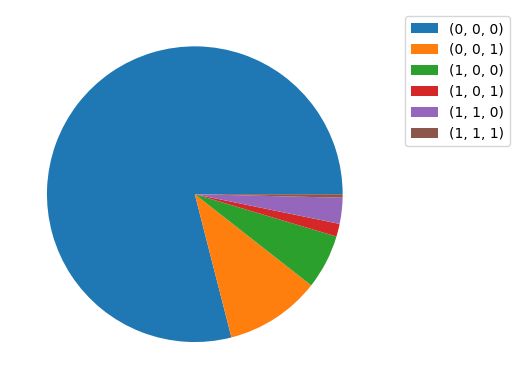

In [187]:
gen_len = len(table)

plt.pie([(end.table_len / gen_len) * 100 for end in possible_ends.values()])

plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
plt.show()

Топ 10 сотрудников по численности

In [188]:
top_workers = table.value_counts('Должность')[:10]
top_workers

Должность
Руководитель направления            8650
Главный инженер по разработке       6294
Ведущий инженер по разработке       3088
Эксперт                             3020
Менеджер                            2509
Исполнительный директор             2233
Старший инженер по разработке       1742
Руководитель проектов               1302
Ведущий инженер по сопровождению     961
Аналитик                             935
dtype: int64

Топ 10 популярных должностей - 70% от общего количества

In [189]:
float("{0:.3f}".format((sum(top_workers.values)/sum(table.value_counts('Должность'))) * 100))

69.118

Топ 10 должностей в каждом варианте

In [190]:
worker_rate = {key: val.worker_rate[:10] for key, val in possible_ends.items()}
for key, val in worker_rate.items():
    print(f"{key}: \n{val}")
    print("\n")

(0, 0, 0): 
Должность
Руководитель направления            6526
Главный инженер по разработке       4986
Эксперт                             2534
Ведущий инженер по разработке       2527
Менеджер                            1905
Исполнительный директор             1597
Старший инженер по разработке       1425
Руководитель проектов               1012
Ведущий инженер по сопровождению     801
Аналитик                             748
dtype: int64


(0, 0, 1): 
Должность
Руководитель направления            1078
Главный инженер по разработке        668
Исполнительный директор              324
Ведущий инженер по разработке        297
Менеджер                             253
Эксперт                              195
Старший инженер по разработке        165
Руководитель проектов                110
Главный инженер                      107
Ведущий инженер по сопровождению      92
dtype: int64


(1, 0, 0): 
Должность
Руководитель направления         596
Главный инженер по разработке    322
Менеджер  

Распределение по исходам для топ 10 должностей на графиках

Руководитель направления


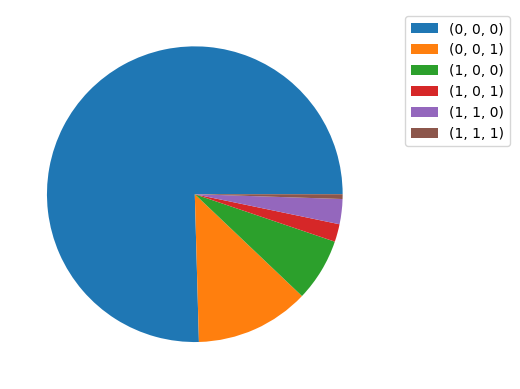

Главный инженер по разработке


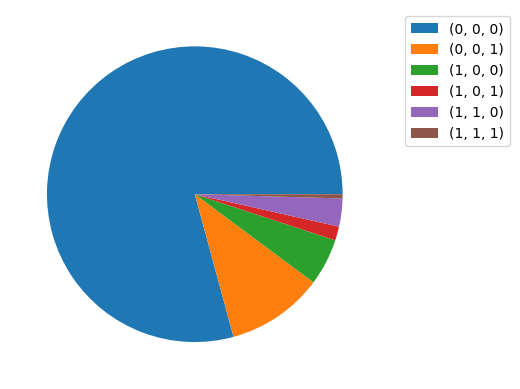

Ведущий инженер по разработке


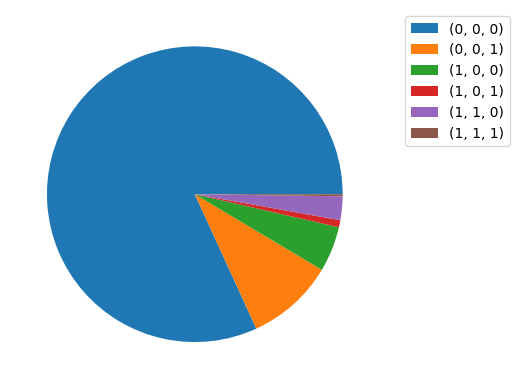

Эксперт


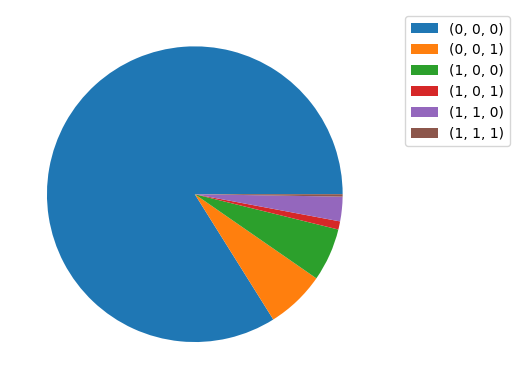

Менеджер


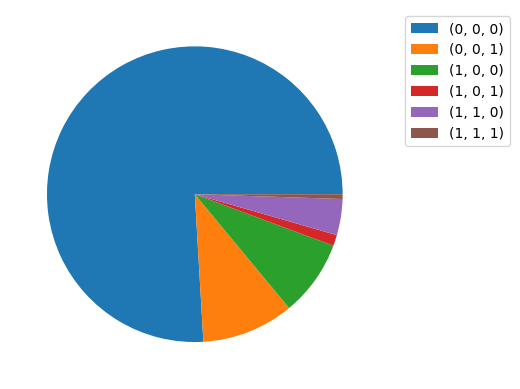

Исполнительный директор


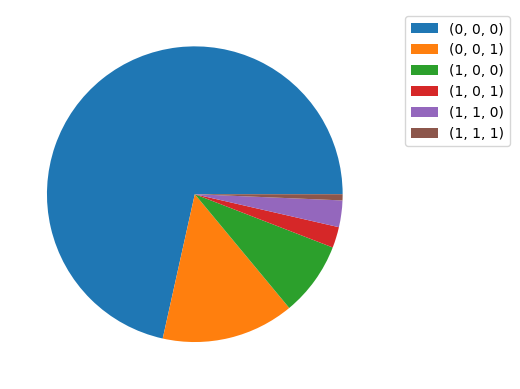

Старший инженер по разработке


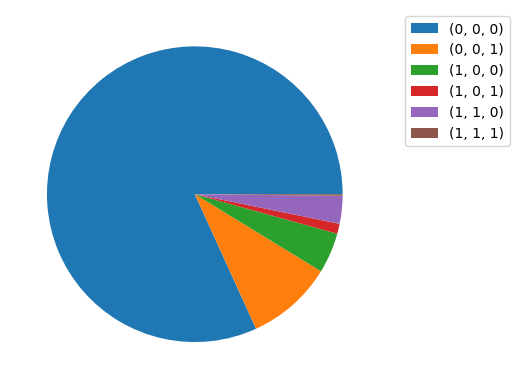

Руководитель проектов


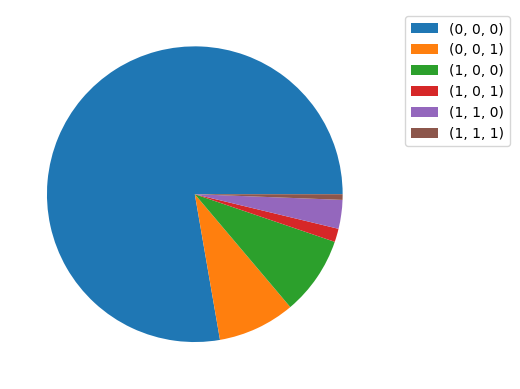

Ведущий инженер по сопровождению


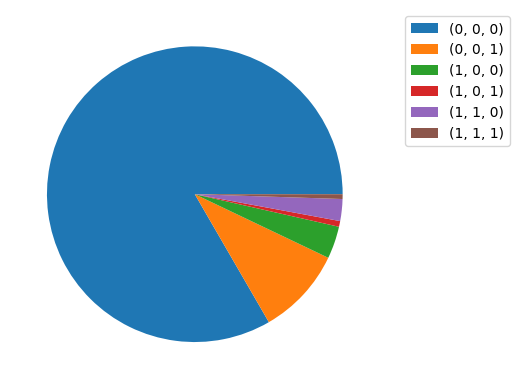

Аналитик


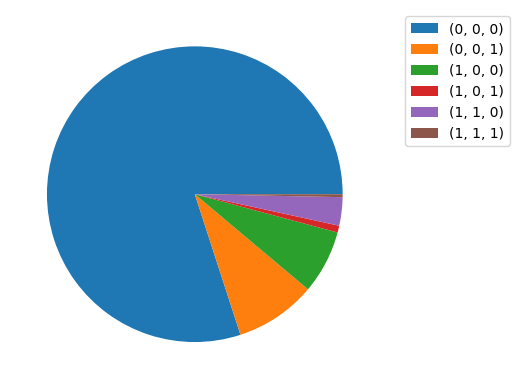

In [191]:
for worker in dict(top_workers).keys():
    print(worker)
    plt.pie([dict(end.worker_rate)[worker] for end in possible_ends.values()])

    plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Топ 10 блоков по численности

In [192]:
top_departments = table.value_counts('Подразделение_3')[:10]
top_departments

Подразделение_3
Блок Технологии                     28220
Блок Корпоративно-инвестиционный     3975
Блок Розничный                       2423
Блок Сервисы                         2028
Блок Управление                      1336
Подразделения вне                    1335
Блок HR                               939
Блок Риски                            912
Блок Финансы                          899
Блок Сеть                             789
dtype: int64

Топ 10 блоков в каждом варианте

In [193]:
department_rate = {key: val.department_rate[:10] for key, val in possible_ends.items()}
for key, val in department_rate.items():
    print(f"{key}: \n{val}")
    print("\n")

(0, 0, 0): 
Подразделение_3
Блок Технологии                     22455
Блок Корпоративно-инвестиционный     3188
Блок Розничный                       1872
Блок Сервисы                         1531
Блок Управление                      1162
Подразделения вне                    1058
Блок HR                               732
Блок Финансы                          711
Другие подразделения                  639
Блок Сеть                             634
dtype: int64


(0, 0, 1): 
Подразделение_3
Блок Технологии                     3081
Блок Риски                           365
Блок Корпоративно-инвестиционный     270
Блок Розничный                       240
Блок Сервисы                         210
Подразделения вне                    100
Блок Финансы                          74
Блок HR                               73
Блок GR,                              69
Другие подразделения                  53
dtype: int64


(1, 0, 0): 
Подразделение_3
Блок Технологии                     1395
Блок Корпоратив

Распределение исходов для топ 10 блоков на графиках

Блок Технологии


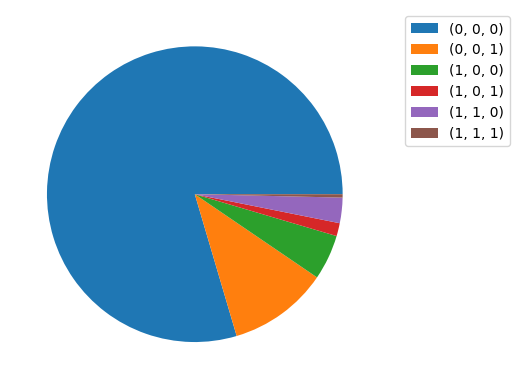

Блок Корпоративно-инвестиционный


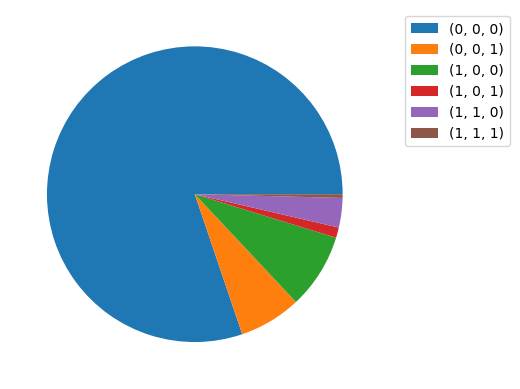

Блок Розничный


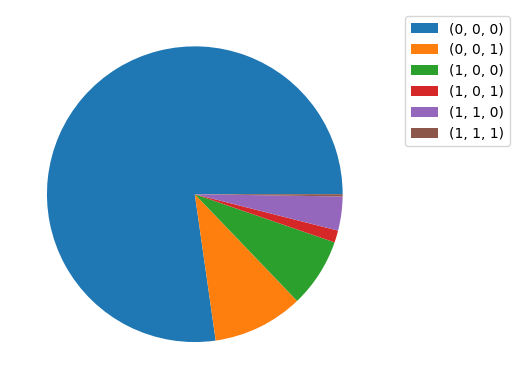

Блок Сервисы


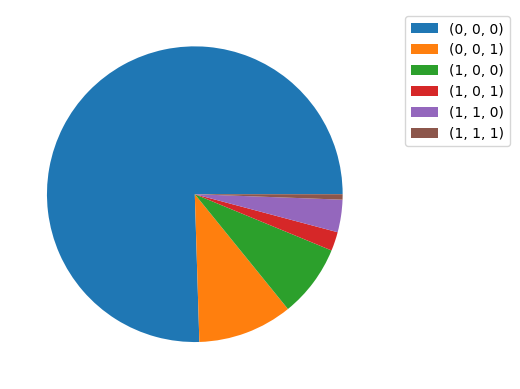

Блок Управление


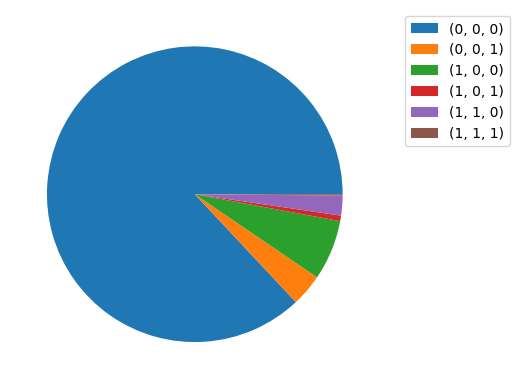

Подразделения вне


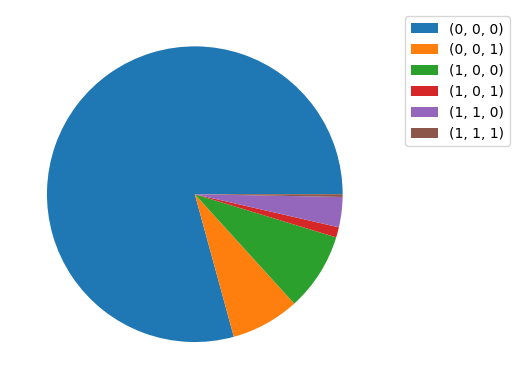

Блок HR


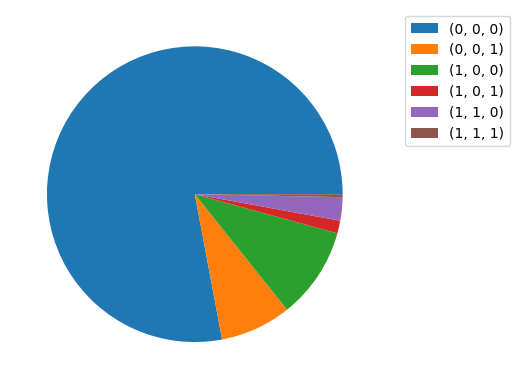

Блок Риски


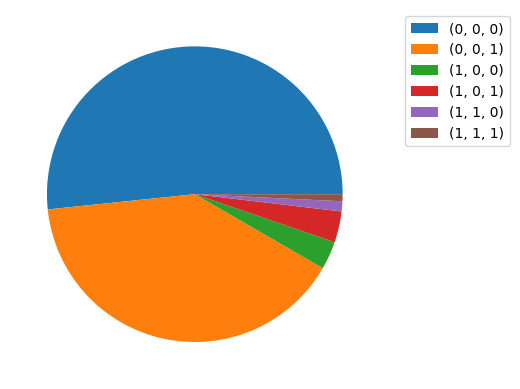

Блок Финансы


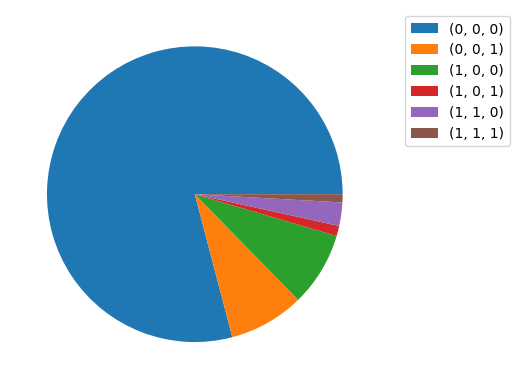

Блок Сеть


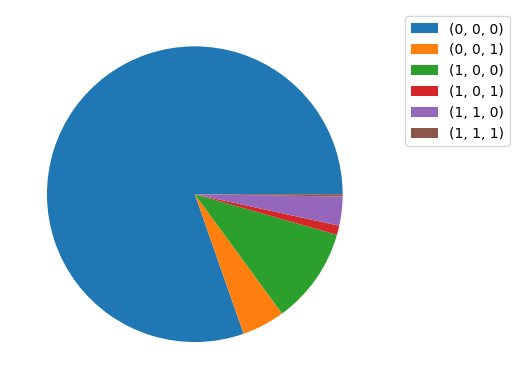

In [194]:
for department in dict(top_departments).keys():
    print(department)
    plt.pie([dict(end.department_rate)[department] for end in possible_ends.values()])

    plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Сравненеи размера каждого исхода с общим размером

In [195]:
fit_workers = [(end.table_len / len(table)) * 100 for end in possible_ends.values()]

In [196]:
other_workers = [100 - (end.table_len / len(table)) * 100 for end in possible_ends.values()]

In [197]:
indexes = [str(key) for key in possible_ends.keys()]
results = {"end": indexes, "Fit": fit_workers, "Other": other_workers}

df = pd.DataFrame(results, index=indexes)

In [198]:
df

,end,Fit,Other
"(0, 0, 0)","(0, 0, 0)",78.986192,21.013808
"(0, 0, 1)","(0, 0, 1)",10.439437,89.560563
"(1, 0, 0)","(1, 0, 0)",5.955112,94.044888
"(1, 0, 1)","(1, 0, 1)",1.398822,98.601178
"(1, 1, 0)","(1, 1, 0)",2.842621,97.157379
"(1, 1, 1)","(1, 1, 1)",0.377817,99.622183


Соотношение объема каждого исхода к общему объему на графике

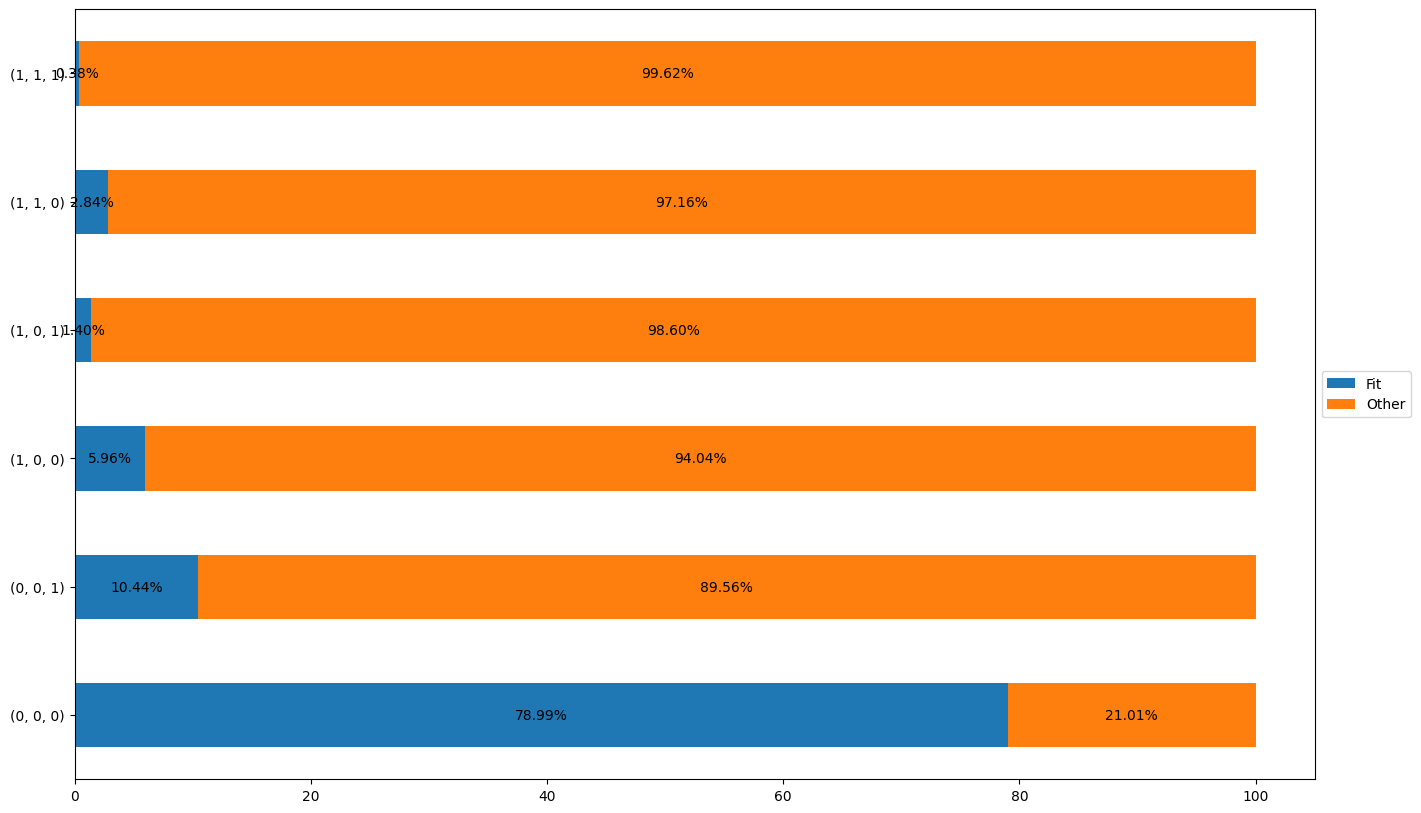

In [199]:
ax = df.plot.barh(stacked=True, figsize=(16, 10))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.2f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center')

Создание таблиц для более удобной обработки исходов

Таблица для топ 10 по популярности должностей

In [200]:
table['Исход'] = list(zip(table['Переход_по_ссылке'], table['Ввод_данных'], table['Сообщение_в_ЦПКБ']))
temp_table = table.drop(columns=['Почта_Sigma', 'Переход_по_ссылке', 'Ввод_данных', 'Сообщение_в_ЦПКБ', 'Подразделение_4'])
top_work = list(dict(top_workers).keys())
temp_table = temp_table.loc[temp_table['Должность'].isin(top_work)]

Полная таблица для всех должностей

In [201]:
table['Исход'] = list(zip(table['Переход_по_ссылке'], table['Ввод_данных'], table['Сообщение_в_ЦПКБ']))
full_temp_table = table.drop(columns=['Почта_Sigma', 'Переход_по_ссылке', 'Ввод_данных', 'Сообщение_в_ЦПКБ', 'Подразделение_4'])
top_work = table['Должность'].unique()
full_temp_table = full_temp_table.loc[full_temp_table['Должность'].isin(top_work)]

In [202]:
full_temp_table

,Должность,Подразделение_3,Исход
0,Ведущий инженер по сопровождению,Блок Технологии,"(0, 0, 0)"
1,Руководитель направления,Блок Технологии,"(0, 0, 0)"
2,Руководитель направления,Блок Риски,"(0, 0, 0)"
3,Исполнительный директор,Блок Технологии,"(1, 0, 0)"
4,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
...,...,...,...
44461,Ведущий инженер по разработке,Блок Технологии,"(0, 0, 0)"
44462,Руководитель направления,Блок Технологии,"(0, 0, 0)"
44463,Менеджер,Блок Технологии,"(0, 0, 0)"
44464,Главный инженер по разработке,Блок Технологии,"(0, 0, 0)"


In [203]:
full_temp_table['Исход'] = full_temp_table['Исход'].map(lambda cell: str(cell))

Распределение по исходам для топ 10 по популярности должностей в каждом отделе

Зададим условный код для каждого исхода, для более удобного представления на графиках. Соответствия кодов и исходов в словаре ниже:

In [204]:
def change_index(index: str) -> str:
    return {'(0, 0, 0)': 'I',
            '(1, 0, 0)': 'B1',
            '(1, 1, 0)': 'B2',
            '(1, 1, 1)': 'B3',
            '(0, 0, 1)': 'G',
            '(1, 0, 1)': 'B4'}[index]

In [205]:
def department_stat(department: str) -> None:
    print(department)
    department_temp = department.split()
    cur_table = full_temp_table.query(f'Подразделение_3 == "{department}"')
    cur_col = cur_table.value_counts('Должность')[:10]
    fig, axs = plt.subplots(2, 5, figsize=(17, 7))
    cur_row = 0
    for ind, worker in enumerate(cur_col.keys()):
        cur_worker_table = cur_table.query(f'Должность == "{worker}"')
        indexes = list(map(change_index, list(cur_worker_table.value_counts('Исход').keys())))
        if ind > 4:
            cur_row = 1
            axs[cur_row, ind - 5].bar(indexes, cur_worker_table.value_counts('Исход').values)
            axs[cur_row, ind - 5].set_title(worker, fontsize=9)
            continue
        axs[cur_row, ind].bar(indexes, cur_worker_table.value_counts('Исход').values)
        axs[cur_row, ind].set_title(worker, fontsize=9)
    plt.show()

Блок Технологии


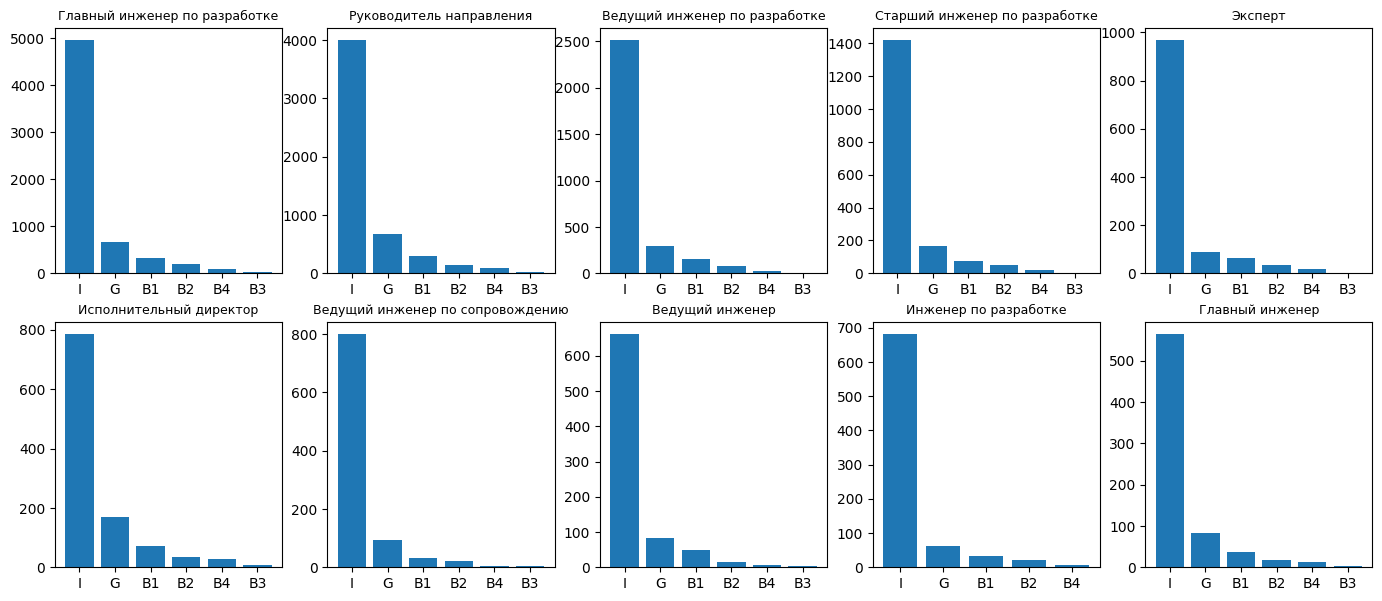

Блок Риски


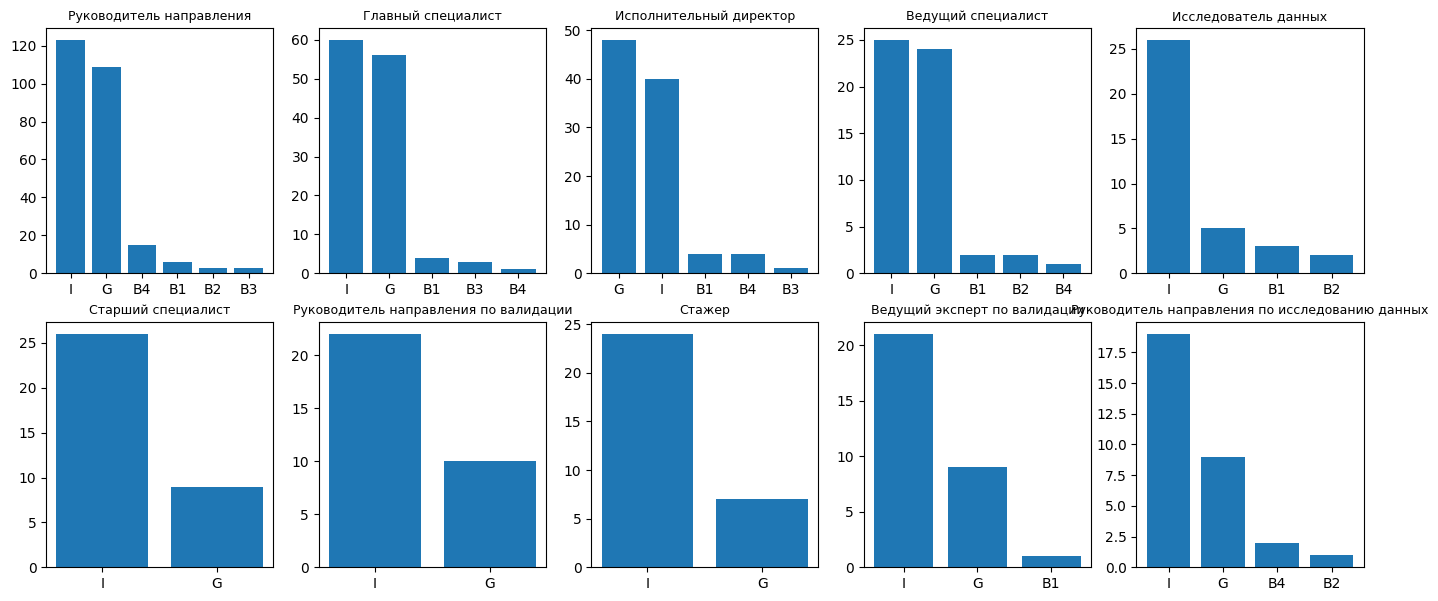

Другие подразделения


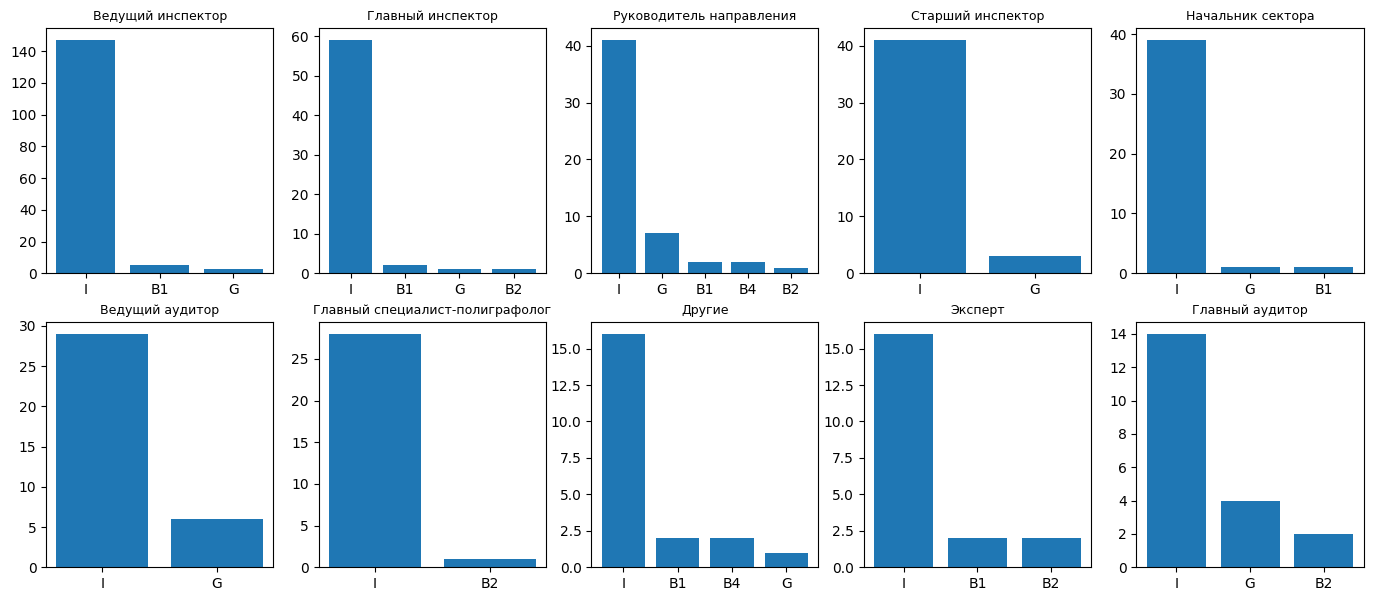

Блок HR


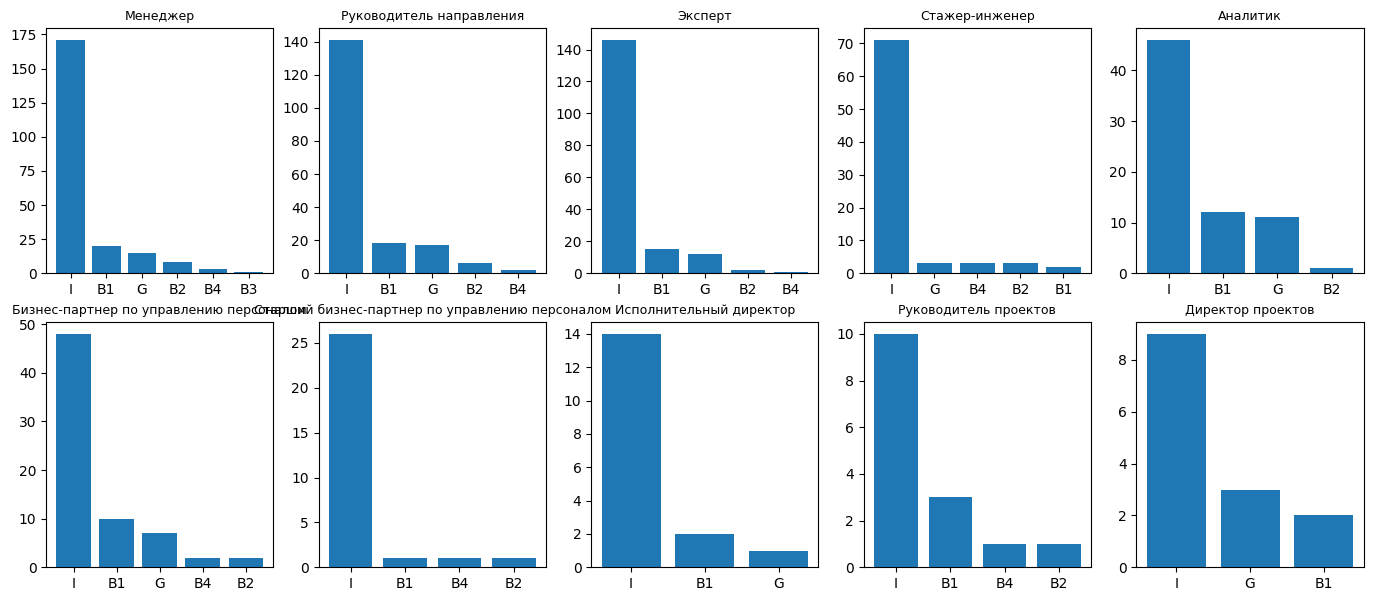

Блок Корпоративно-инвестиционный


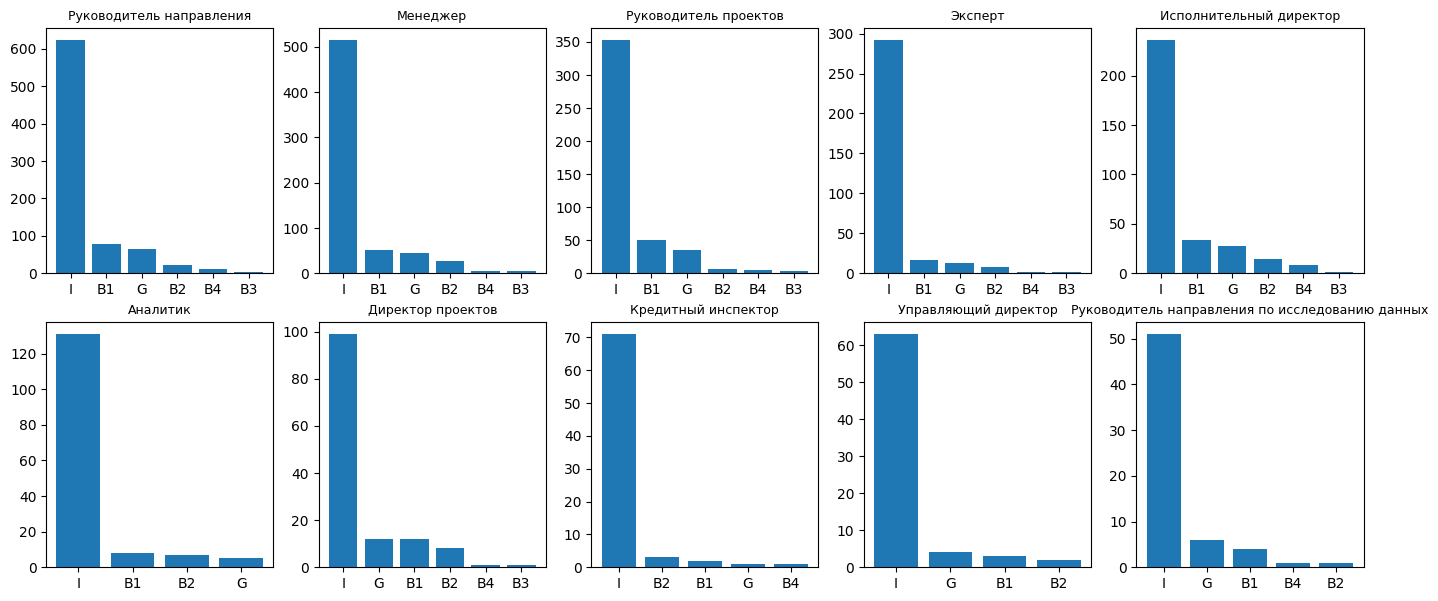

Блок Сервисы


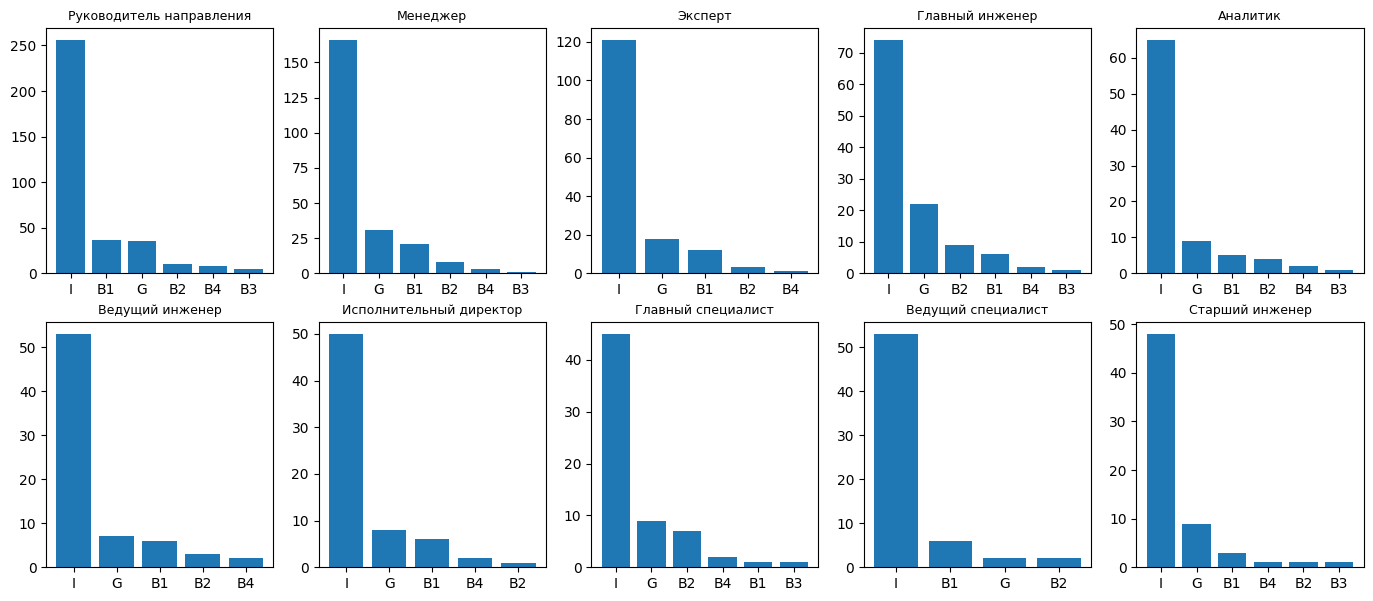

Блок GR,


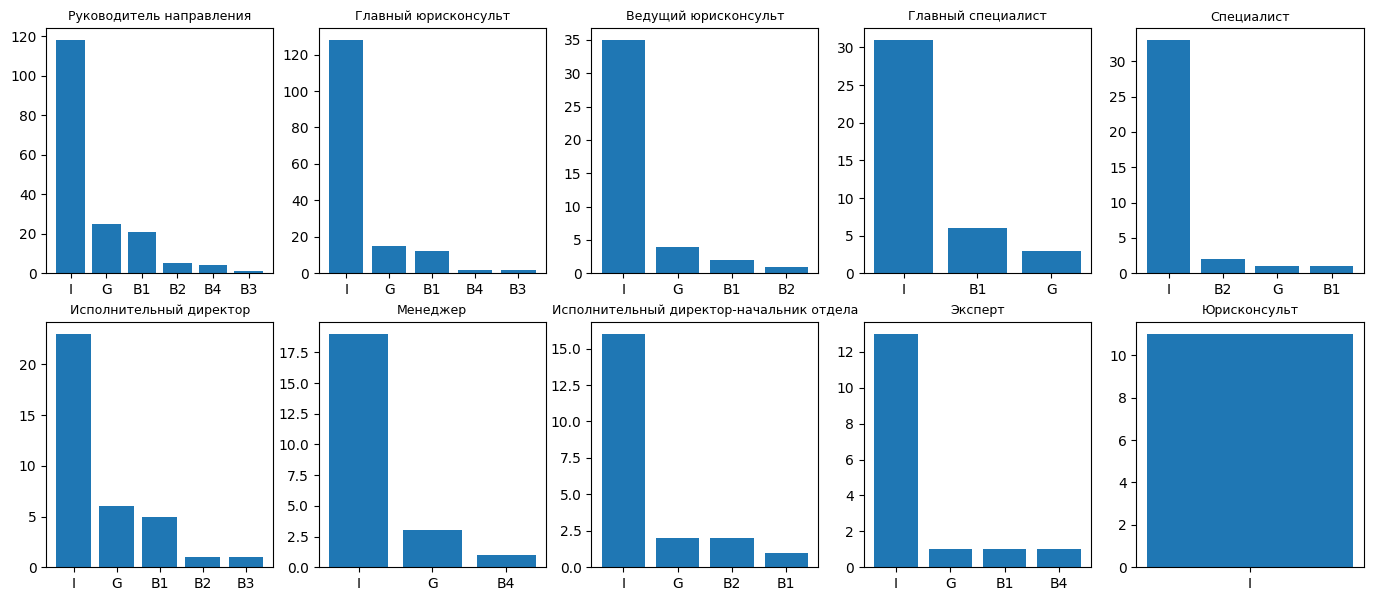

Блок Финансы


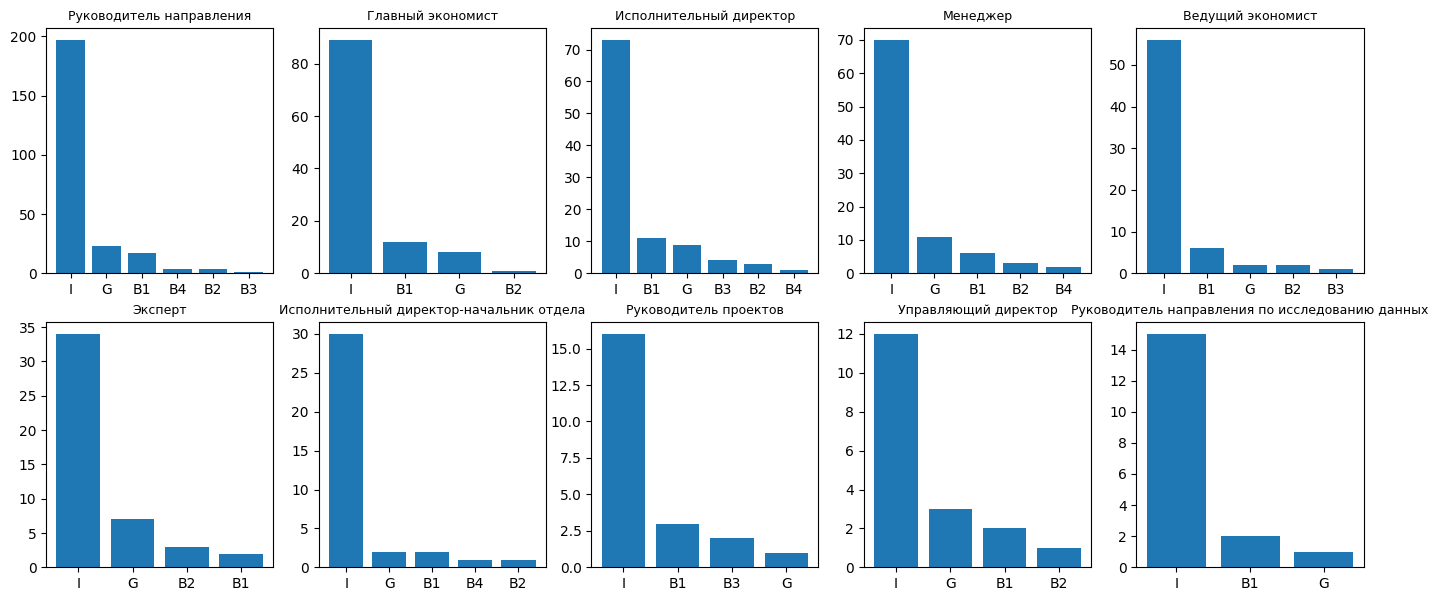

Блок Стратегия


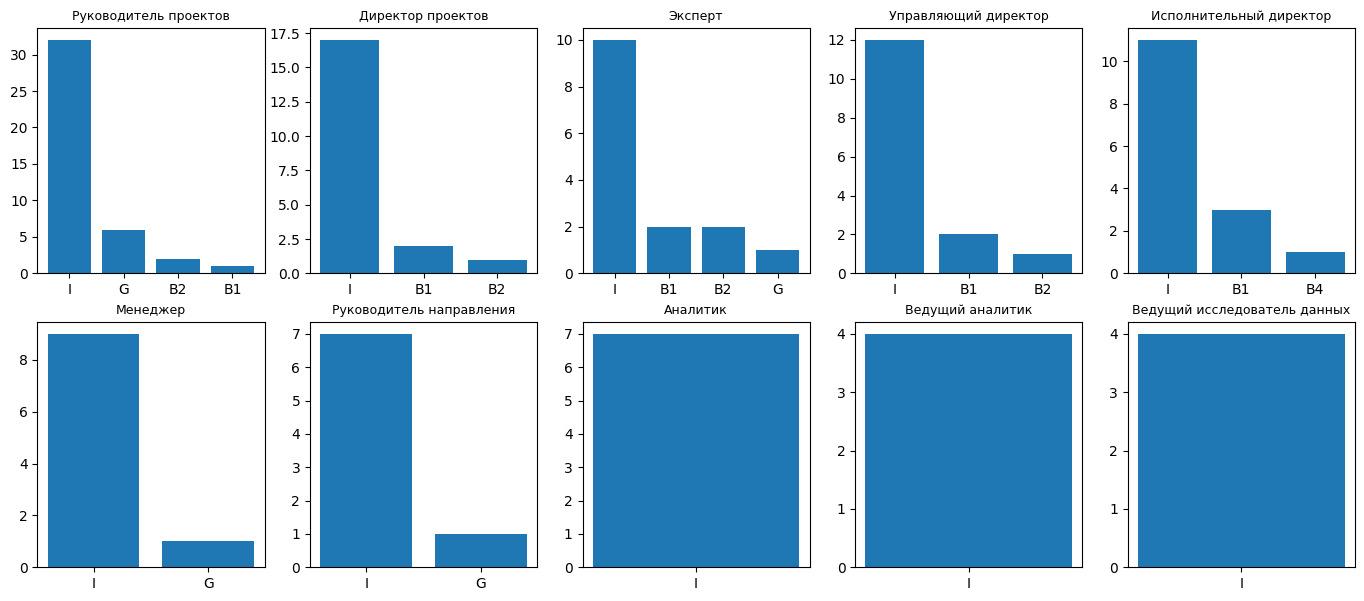

Блок Розничный


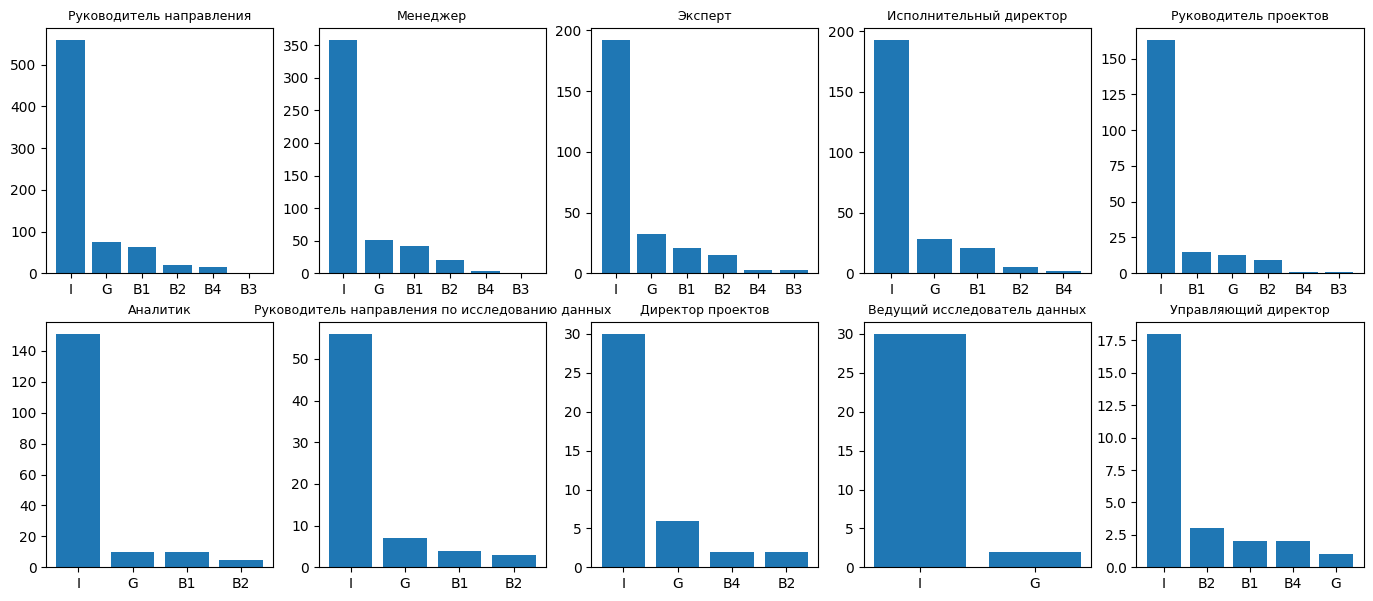

Подразделения вне


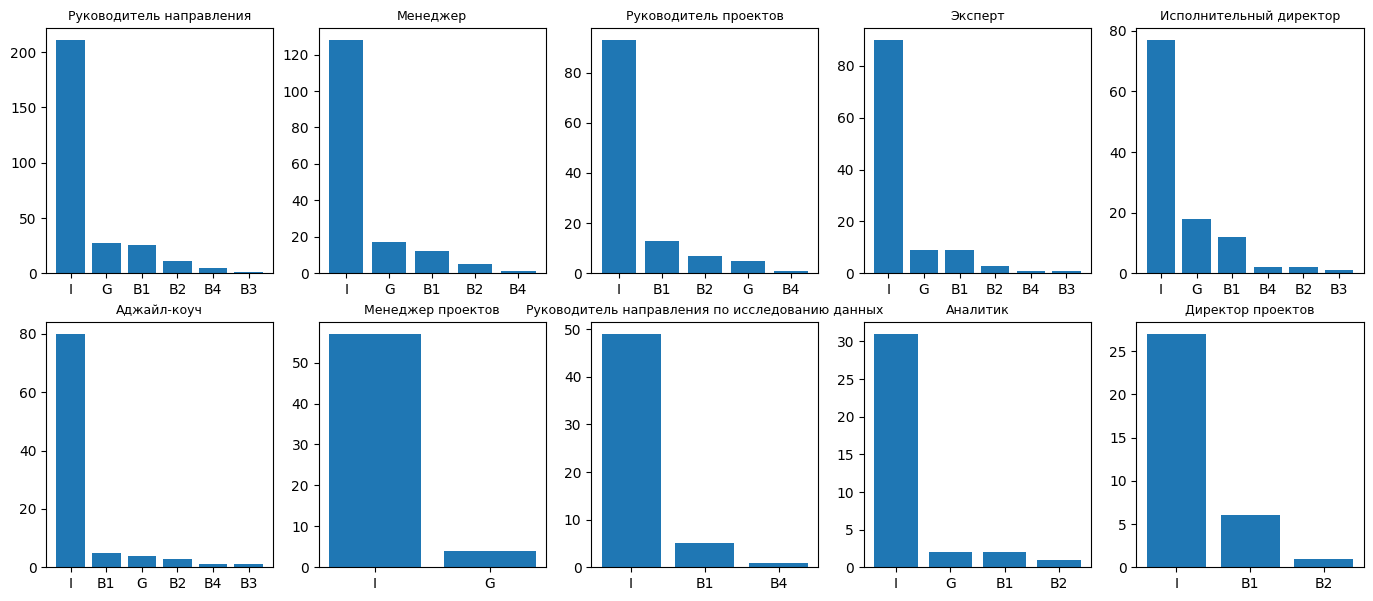

Блок Сеть


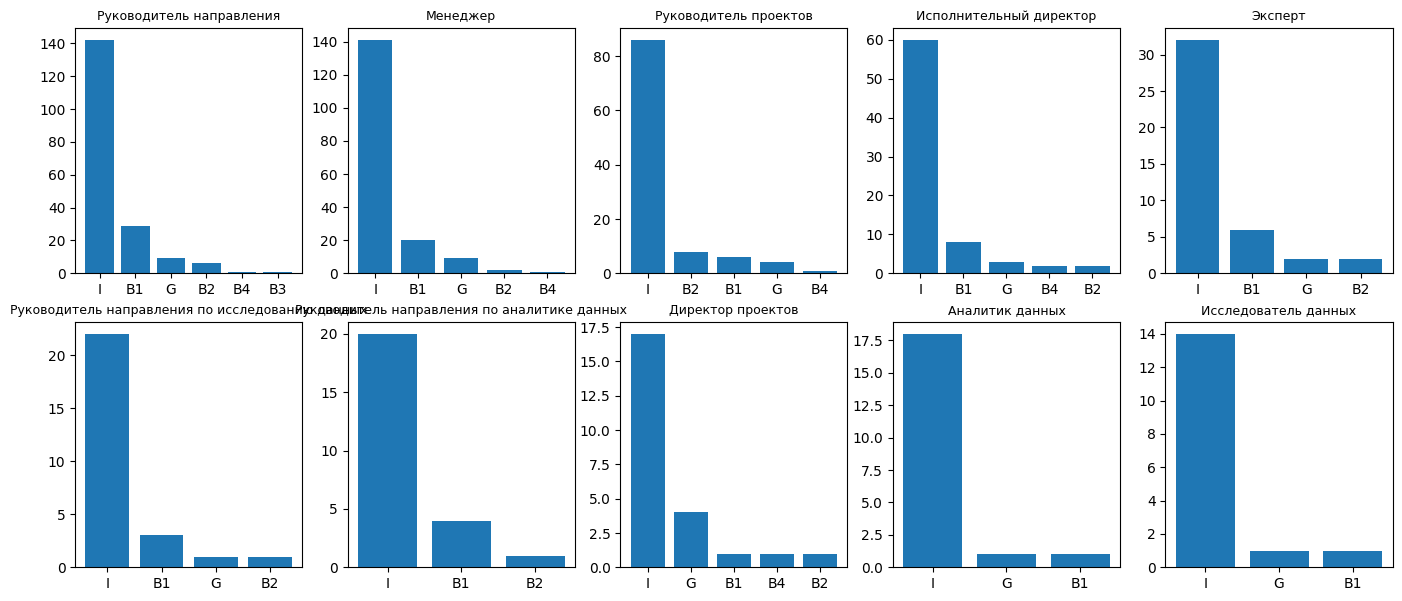

Блок Управление


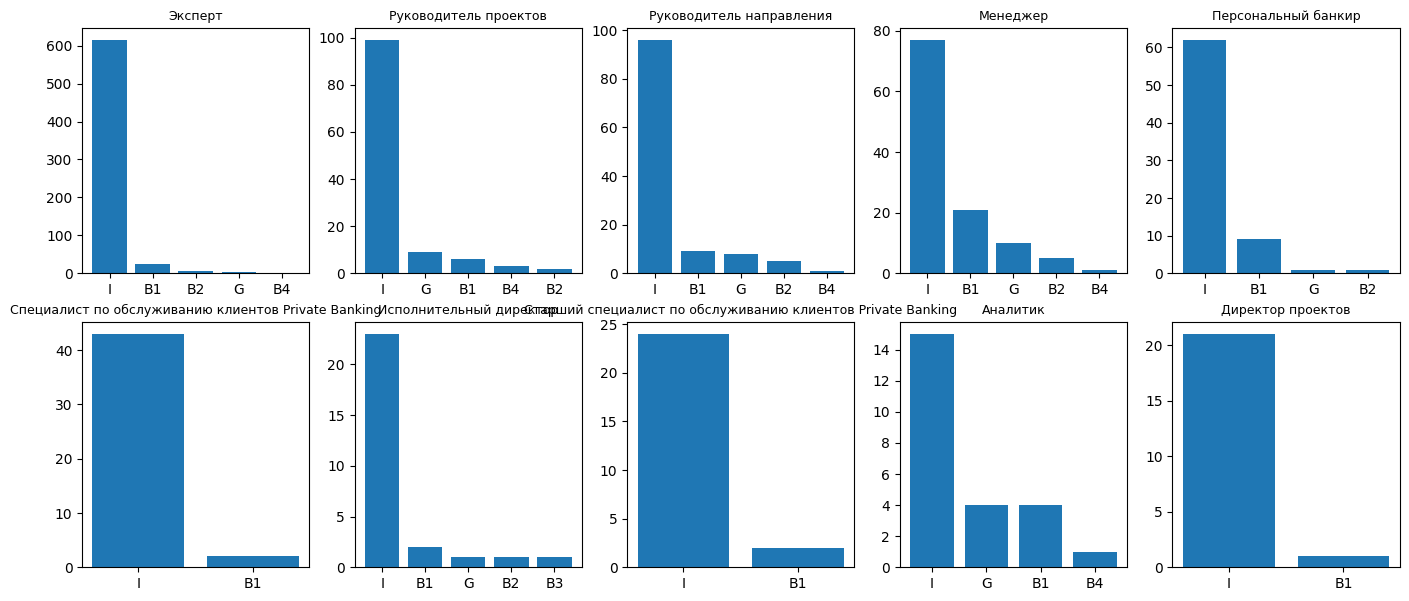

Блок Sberbank


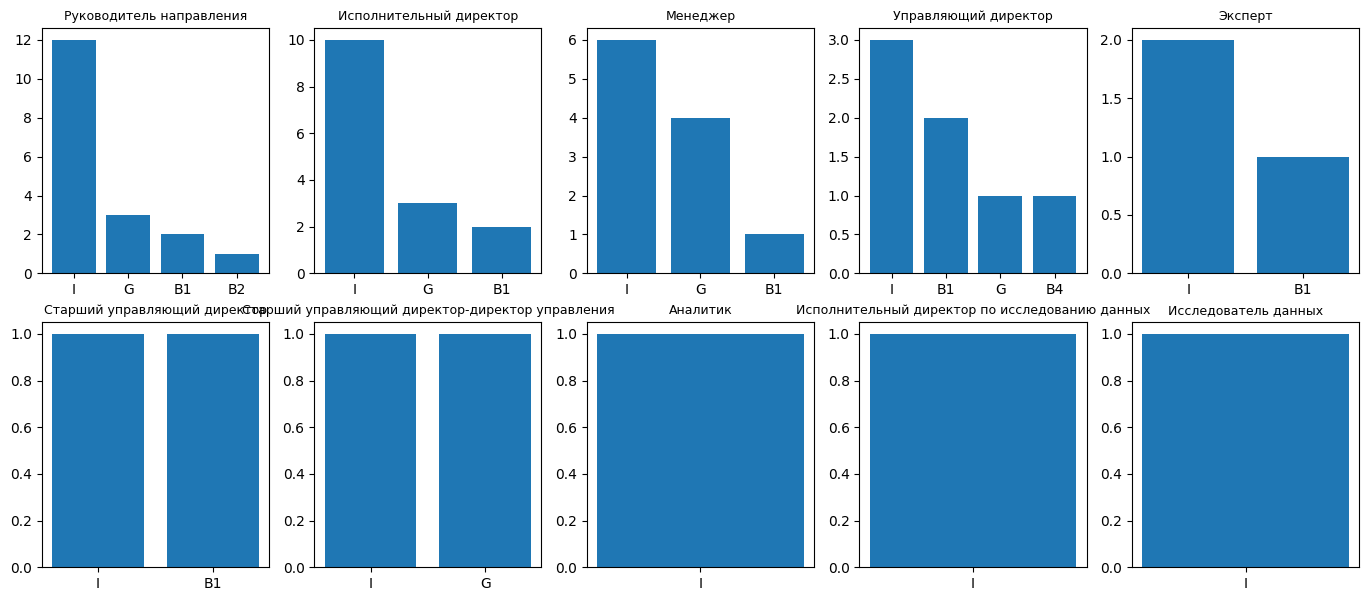

In [206]:
for department in table['Подразделение_3'].unique():
    department_stat(department)

# Подсчет без (0, 0, 0)

Выделение исходов без (0, 0, 0)

In [207]:
new_codes = [(0, 0, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]

Рассчет описания исходов по новому списку

In [208]:
new_possible_ends = {code: check_end(code) for code in new_codes}

Общее распределение исходов без учета (0, 0, 0)

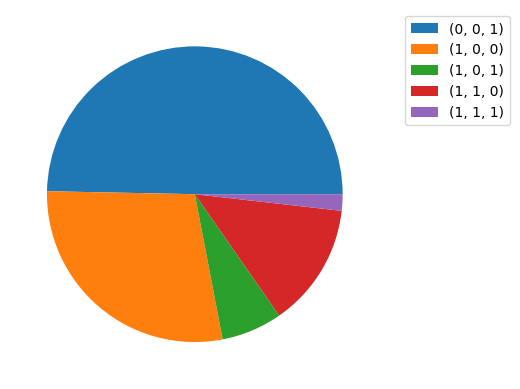

In [209]:
plt.pie([end.table_len for end in new_possible_ends.values()])

plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
plt.show()

Видим, что половина от активных людей сообщила о нарушении, остальная половина так или иначе на атаку повелась

Распределение исходов по топ 10 по популярности должностям без (0, 0, 0)

Руководитель направления


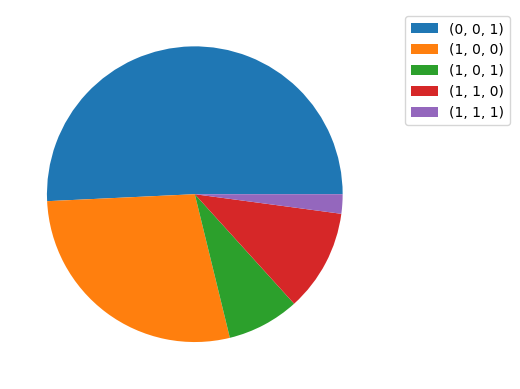

Главный инженер по разработке


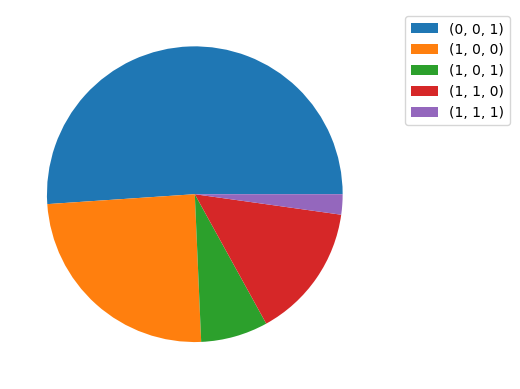

Ведущий инженер по разработке


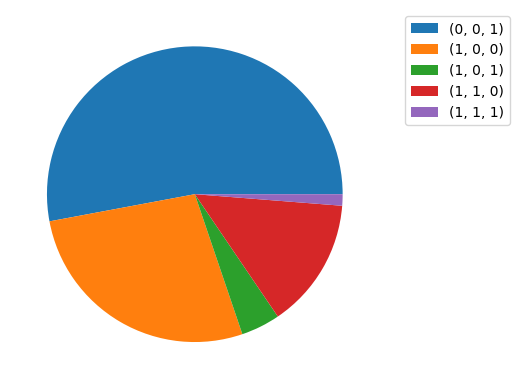

Эксперт


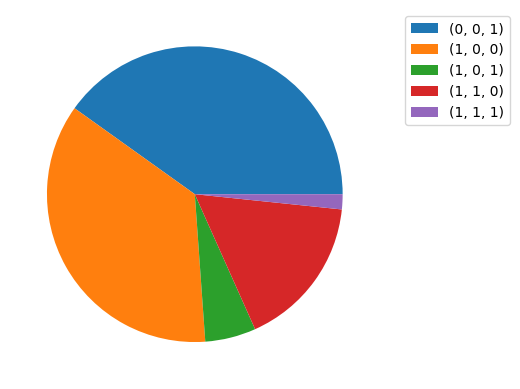

Менеджер


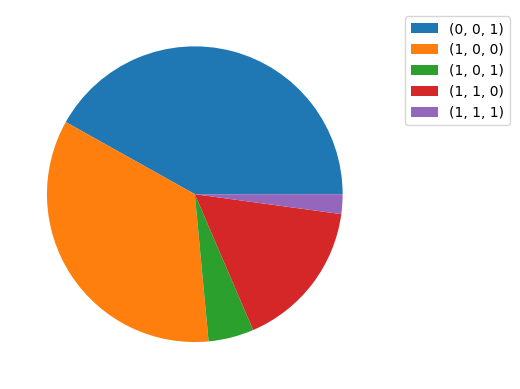

Исполнительный директор


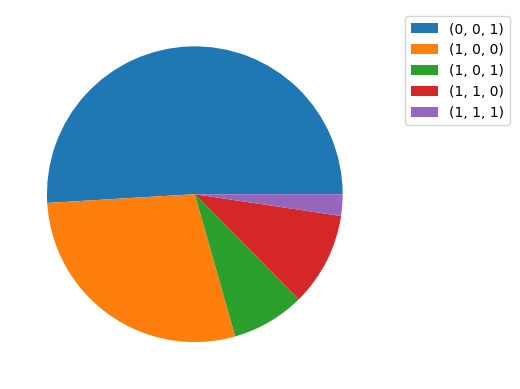

Старший инженер по разработке


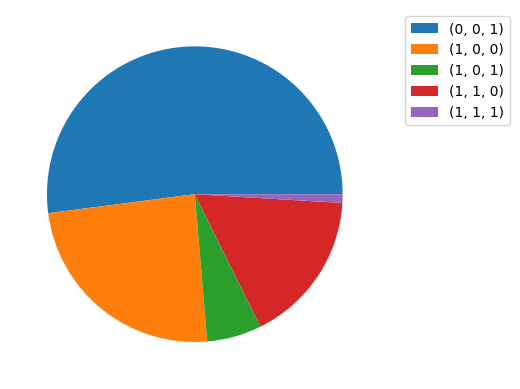

Руководитель проектов


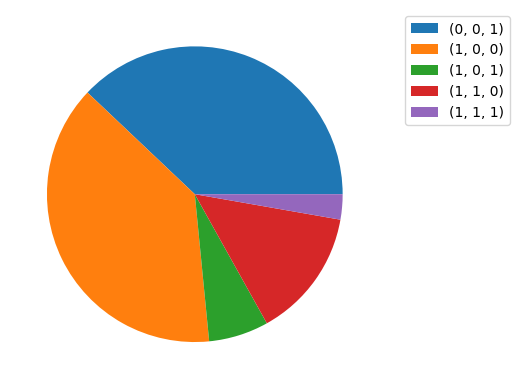

Ведущий инженер по сопровождению


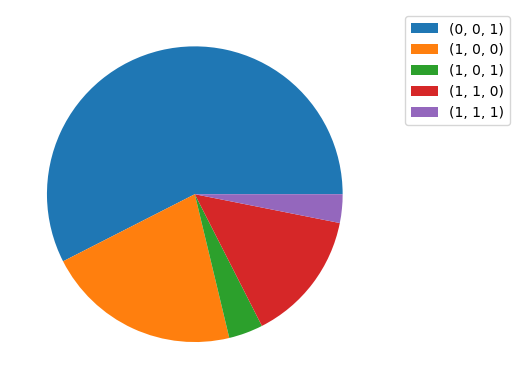

Аналитик


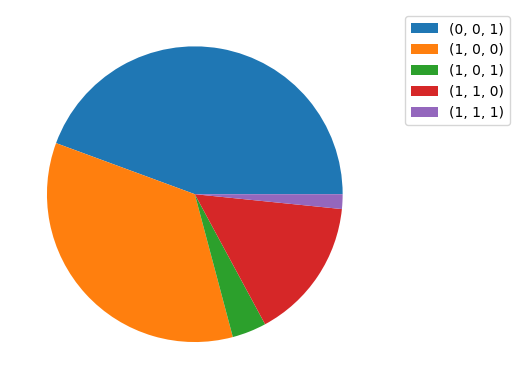

In [210]:
for worker in dict(top_workers).keys():
    print(worker)
    plt.pie([dict(end.worker_rate)[worker] for end in new_possible_ends.values()])

    plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Можно отметить, что люди без явного технического образования более подвержены фишингу. Среди инженеров доминирует вариант 0, 0, 1

Распределение исходов по блокам без (0, 0, 0)

Блок Технологии


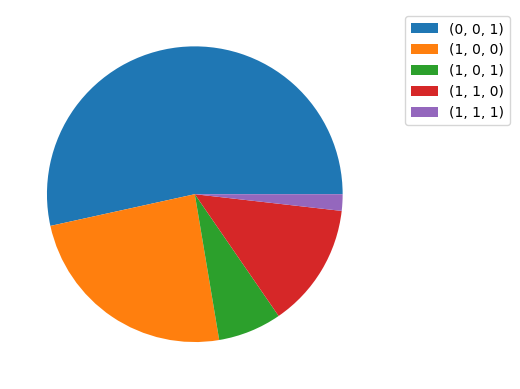

Блок Корпоративно-инвестиционный


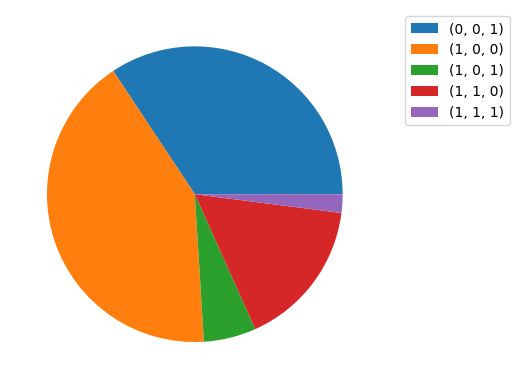

Блок Розничный


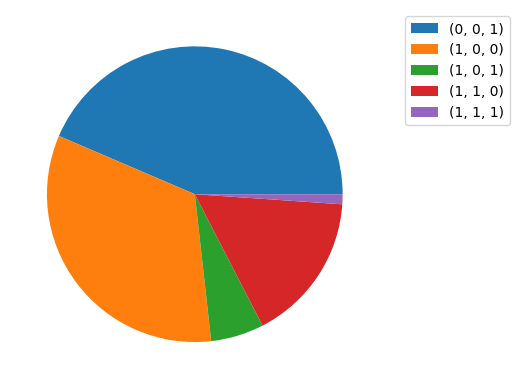

Блок Сервисы


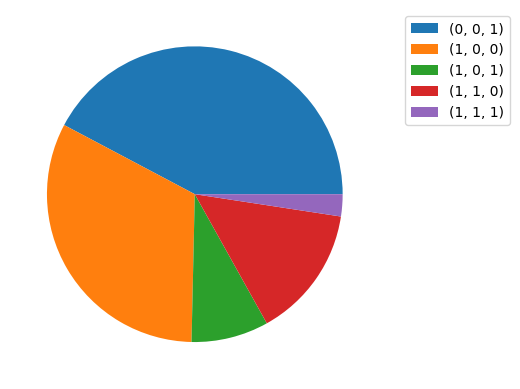

Блок Управление


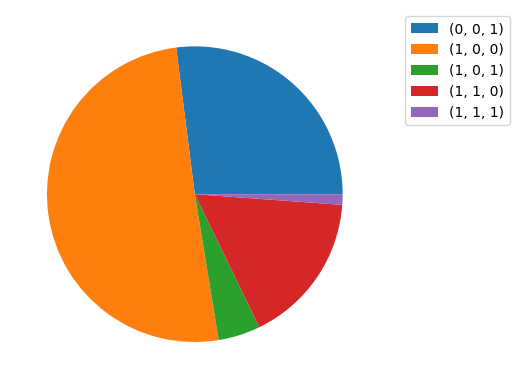

Подразделения вне


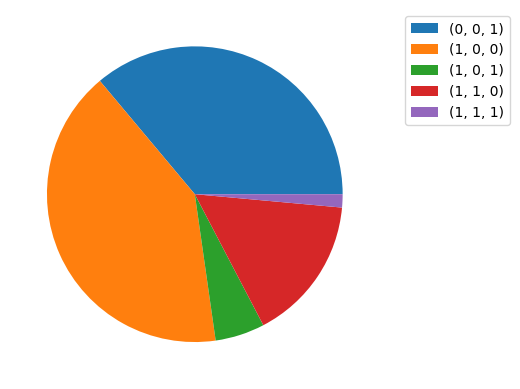

Блок HR


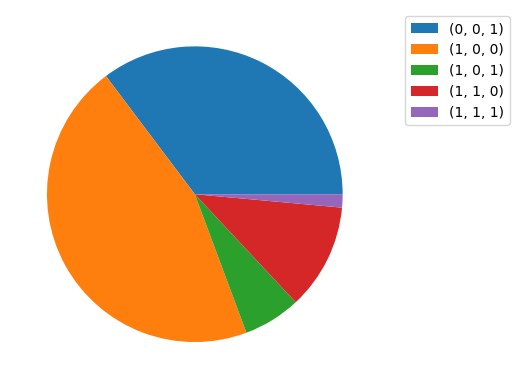

Блок Риски


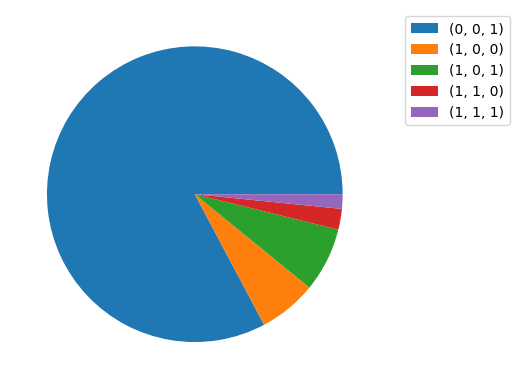

Блок Финансы


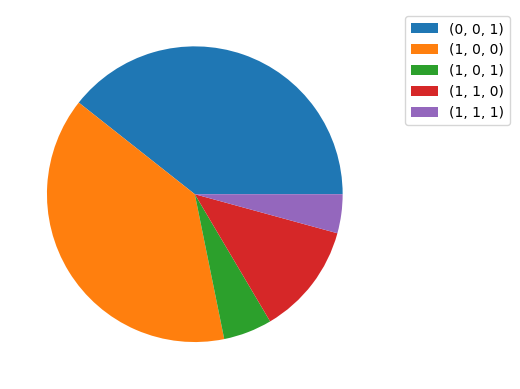

Блок Сеть


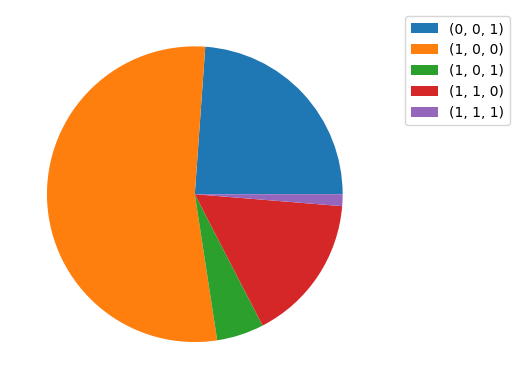

In [211]:
for department in dict(top_departments).keys():
    print(department)
    plt.pie([dict(end.department_rate)[department] for end in new_possible_ends.values()])

    plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Здесь в негавтивном смысле выделяются блоки: Сеть продаж и Управление благосостоянием там очень много людей повелось на атаку. В позтитивном ключе выделился отдел Риски, там ярко доминирует вариант 0, 0, 1

# Подсчет вероятности наступления исхода

Подготовка таблицы

In [212]:
temp_table

,Должность,Подразделение_3,Исход
0,Ведущий инженер по сопровождению,Блок Технологии,"(0, 0, 0)"
1,Руководитель направления,Блок Технологии,"(0, 0, 0)"
2,Руководитель направления,Блок Риски,"(0, 0, 0)"
3,Исполнительный директор,Блок Технологии,"(1, 0, 0)"
4,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
...,...,...,...
44460,Руководитель направления,Блок Розничный,"(1, 0, 0)"
44461,Ведущий инженер по разработке,Блок Технологии,"(0, 0, 0)"
44462,Руководитель направления,Блок Технологии,"(0, 0, 0)"
44463,Менеджер,Блок Технологии,"(0, 0, 0)"


In [213]:
temp_table['Исход'] = temp_table['Исход'].map(lambda cell: str(cell))

Функция для оценки вероятности наступления исхода

In [214]:
def get_probability_w(cur_end: tuple) -> dict:
    print(cur_end)
    cur_table = temp_table.query(f'Исход == "{str(cur_end)}"')
    gen_col = dict(table.value_counts('Должность'))
    cur_col = dict(cur_table.value_counts('Должность'))
    return {worker: f"{cur_col[worker]/gen_col[worker]:0.2f}" for worker in cur_col.keys()}

Оценка для топ-10 по популярности должностей

In [215]:
for end in possible_ends:
    cur_top = get_probability_w(end)
    for row in cur_top.items():
        print(f"Вероятность для {row[0]} - {row[1]}")

(0, 0, 0)
Вероятность для Руководитель направления - 0.75
Вероятность для Главный инженер по разработке - 0.79
Вероятность для Эксперт - 0.84
Вероятность для Ведущий инженер по разработке - 0.82
Вероятность для Менеджер - 0.76
Вероятность для Исполнительный директор - 0.72
Вероятность для Старший инженер по разработке - 0.82
Вероятность для Руководитель проектов - 0.78
Вероятность для Ведущий инженер по сопровождению - 0.83
Вероятность для Аналитик - 0.80
(0, 0, 1)
Вероятность для Руководитель направления - 0.12
Вероятность для Главный инженер по разработке - 0.11
Вероятность для Исполнительный директор - 0.15
Вероятность для Ведущий инженер по разработке - 0.10
Вероятность для Менеджер - 0.10
Вероятность для Эксперт - 0.06
Вероятность для Старший инженер по разработке - 0.09
Вероятность для Руководитель проектов - 0.08
Вероятность для Ведущий инженер по сопровождению - 0.10
Вероятность для Аналитик - 0.09
(1, 0, 0)
Вероятность для Руководитель направления - 0.07
Вероятность для Главны

Видим высокую вероятность для исхода (0, 0, 0), для отсальных исходов значения не превосходят 0.2

In [216]:
def get_probability_w_full(cur_end: tuple) -> dict:
    print('\n')
    print('\n', cur_end, '\n', sep='')
    cur_table = full_temp_table.query(f'Исход == "{str(cur_end)}"')
    gen_col = dict(table.value_counts('Должность'))
    cur_col = dict(cur_table.value_counts('Должность'))
    return {worker: f"{cur_col[worker]/gen_col[worker]:0.2f}" for worker in cur_col.keys()}

Полная оценка для каждой должности

In [217]:
for end in possible_ends:
    cur_top = get_probability_w_full(end)
    cur_top = {key: float(val) for key, val in cur_top.items()}
    cur_top = dict(sorted(cur_top.items(), key=lambda item: item[1], reverse=True))
    print('\n', f'Средний показатель - {median(list(cur_top.values()))}', '\n', sep='')
    for row in cur_top.items():
        print(f"Вероятность для {row[0]} - {row[1]}")




(0, 0, 0)


Средний показатель - 0.93

Вероятность для Инженер-разработчик - 1.0
Вероятность для Юрисконсульт - 1.0
Вероятность для Директор по внутренней безопасности - 1.0
Вероятность для Секретарь заместителя Председателя Правления - 1.0
Вероятность для Руководитель направления-старший финансовый контролер - 1.0
Вероятность для Продуктовый менеджер - 1.0
Вероятность для Начальник смены-старший охранник - 1.0
Вероятность для Старший инженер-электрик - 1.0
Вероятность для Инженер-механик - 1.0
Вероятность для Инженер-электрик - 1.0
Вероятность для Управляющий директор по исследованию данных - 1.0
Вероятность для Ведущий аудитор-аналитик данных - 1.0
Вероятность для Старший сейлз - 1.0
Вероятность для Аудитор - 1.0
Вероятность для Младший cейлз-трейдер - 1.0
Вероятность для Уборщик - 1.0
Вероятность для Техник-электрик - 1.0
Вероятность для Управляющий директор, заместитель директора департамента-начальник управления - 1.0
Вероятность для Ведущий специалист по продажам - 1.0
Вероятн


Средний показатель - 0.03

Вероятность для Управляющий директор-руководитель службы - 1.0
Вероятность для Директор управления - 1.0
Вероятность для Руководитель направления процессов - 1.0
Вероятность для Главный электромеханик - 1.0
Вероятность для Редактор - 0.5
Вероятность для Директор по продуктам - 0.33
Вероятность для Старший банкир - 0.2
Вероятность для Исполнительный директор-старший трейдер - 0.2
Вероятность для Директор по развитию - 0.2
Вероятность для Медиатор - 0.2
Вероятность для Экономист - 0.14
Вероятность для Директор по крупнейшим клиентам - 0.12
Вероятность для Помощник заместителя Председателя Правления - 0.12
Вероятность для Советник Президента - 0.12
Вероятность для Технолог - 0.11
Вероятность для Директор дивизиона - 0.1
Вероятность для Главный аудитор - 0.1
Вероятность для Инспектор - 0.1
Вероятность для Ведущий дизайнер - 0.09
Вероятность для Бизнес-менеджер - 0.09
Вероятность для Администратор - 0.09
Вероятность для Трейдер - 0.08
Вероятность для Исполнительн

Здесь так же очень высока вероятность исхода (0, 0, 0). Далее идет (0, 0, 1), там среднее значение - 0.12. Для остальных исходов среднее значение не превышает 0.1

Оценка наиболее уязвимых к фишингу должностей (от 5 и более человек в компании)

In [218]:
def check_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    cur_workers_col = {key: val for key, val in cur_workers_col.items() if val >= 5}
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)[:10]
        

In [219]:
bad_codes = [(1, 0, 0), (1, 1, 0), (1, 0, 1), (1, 1, 1)]

In [220]:
for code in bad_codes:
    print(code)
    cur_top = check_worker(code)
    for worker in cur_top:
        print(f"{worker[0]}: {worker[1]:0.2f}")
    print("\n")

(1, 0, 0)
Управляющий директор-начальник отдела: 0.23
Старший руководитель проектов: 0.22
Бизнес-партнер по управлению персоналом: 0.14
Управляющий директор-начальник управления: 0.13
Персональный банкир: 0.12
Главный экономист: 0.11
Кредитный менеджер: 0.10
Управляющий директор: 0.09
Руководитель проектов: 0.09
Менеджер: 0.08


(1, 1, 0)
Ведущий дизайнер: 0.09
Управляющий директор: 0.06
Исполнительный директор-начальник отдела: 0.06
Директор проектов: 0.05
Управляющий директор-начальник управления: 0.04
Менеджер: 0.04
Ведущий аналитик: 0.04
Старший аналитик: 0.04
Главный специалист: 0.04
Руководитель направления по исследованию данных: 0.03


(1, 0, 1)
Управляющий директор-начальник управления: 0.04
Главный эксперт: 0.03
Ведущий эксперт по технологиям: 0.03
Руководитель направления по аналитике данных: 0.03
Исполнительный директор-начальник отдела: 0.02
Руководитель направления по исследованию данных: 0.02
Исполнительный директор: 0.02
Управляющий директор: 0.02
Ведущий аналитик: 0.02

В исходе (1, 0, 0) первые места занимают руководящие должности. Такая же тенеденция и для (1, 1, 0), но с меньшей вероятностью настпуления

Рассмотрение хорошего исхода

In [221]:
print("(0, 0, 1)")
cur_top = check_worker((0, 0, 1))
for worker in cur_top:
    print(f"{worker[0]}: {worker[1]:0.2f}")

(0, 0, 1)
Бизнес-партнер по кибербезопасности: 0.50
Исполнительный директор по валидации: 0.38
Руководитель направления по валидации: 0.31
Старший управляющий директор-директор департамента: 0.31
Ведущий эксперт по валидации: 0.29
Главный специалист: 0.28
Директор дивизиона: 0.27
Эксперт по валидации: 0.23
Управляющий директор-начальник центра: 0.20
Ведущий специалист: 0.19


Здесь на первом месте - специалисты по кибербезопасности, далее отвественные за валидацию

Рассмотрение варианта с игнорированием

In [222]:
print("(0, 0, 0)")
cur_top = check_worker((0, 0, 0))
for worker in cur_top:
    print(f"{worker[0]}: {worker[1]:0.2f}")

(0, 0, 0)
Инженер-разработчик: 1.00
Юрисконсульт: 1.00
Директор по внутренней безопасности: 1.00
Секретарь заместителя Председателя Правления: 1.00
Руководитель направления-старший финансовый контролер: 1.00
Продуктовый менеджер: 1.00
Начальник смены-старший охранник: 1.00
Старший инженер-электрик: 1.00
Инженер-механик: 1.00
Инженер-электрик: 1.00


Слишком много людей просто игнорируют сообщения

Оценка наиболее уязвимых к фишингу блоков

In [223]:
def check_department(cur_end: tuple) -> list:
    gen_dep_col = table.value_counts('Подразделение_3')
    cur_dep_col = dict(possible_ends[cur_end].department_rate)
    dep_col_diff = defaultdict(float)
    for department in cur_dep_col:
        try:
            dep_col_diff[department] = cur_dep_col[department]/gen_dep_col[department]
        except KeyError:
            pass
        
    return sorted(dep_col_diff.items(), key=lambda item: item[1], reverse=True)

In [224]:
for code in bad_codes:
    print(code)
    cur_top = check_department(code)
    for department in cur_top:
        print(f"{department[0]}: {department[1]:0.2f}")
    print("\n")

(1, 0, 0)
Блок Sberbank: 0.14
Блок Сеть: 0.11
Блок HR: 0.10
Блок GR,: 0.09
Подразделения вне: 0.09
Блок Корпоративно-инвестиционный: 0.08
Блок Финансы: 0.08
Блок Сервисы: 0.08
Блок Розничный: 0.08
Блок Стратегия: 0.07
Блок Управление: 0.07
Блок Технологии: 0.05
Блок Риски: 0.03
Другие подразделения: 0.03


(1, 1, 0)
Блок Стратегия: 0.05
Блок Розничный: 0.04
Блок Сервисы: 0.04
Подразделения вне: 0.03
Блок Корпоративно-инвестиционный: 0.03
Блок Сеть: 0.03
Блок Технологии: 0.03
Блок Финансы: 0.03
Блок HR: 0.03
Блок Управление: 0.02
Блок GR,: 0.02
Другие подразделения: 0.02
Блок Sberbank: 0.02
Блок Риски: 0.01


(1, 0, 1)
Блок Риски: 0.03
Блок Сервисы: 0.02
Блок GR,: 0.02
Блок Sberbank: 0.02
Блок Технологии: 0.01
Блок HR: 0.01
Блок Розничный: 0.01
Блок Корпоративно-инвестиционный: 0.01
Подразделения вне: 0.01
Блок Финансы: 0.01
Блок Сеть: 0.01
Блок Стратегия: 0.01
Блок Управление: 0.01
Другие подразделения: 0.01


(1, 1, 1)
Блок Финансы: 0.01
Блок Риски: 0.01
Блок GR,: 0.01
Блок Сервисы: 0

Наиболее подвержены (1, 0, 0) и (1, 1, 0) блоки Sberbank, Сети, Стратегия, Розничный 

Рассмотрение хорошего исхода

In [225]:
print("(0, 0, 1)")
cur_top = check_department((0, 0, 1))
for department in cur_top:
    print(f"{department[0]}: {department[1]:0.2f}")

(0, 0, 1)
Блок Риски: 0.40
Блок Sberbank: 0.20
Блок Технологии: 0.11
Блок GR,: 0.10
Блок Сервисы: 0.10
Блок Розничный: 0.10
Блок Финансы: 0.08
Блок HR: 0.08
Подразделения вне: 0.07
Другие подразделения: 0.07
Блок Корпоративно-инвестиционный: 0.07
Блок Стратегия: 0.07
Блок Сеть: 0.05
Блок Управление: 0.04


Позитивно выделяется блок Риски, у него вероятность исхода 0.4 и это в 2 раза выше, чем у 2-ого места. При этом блок Sberbank так же имеет высокую вероятность для исхода (0, 0, 1)

Рассмотрение варианта с игнорированием

In [226]:
print("(0, 0, 0)")
cur_top = check_department((0, 0, 0))
for department in cur_top:
    print(f"{department[0]}: {department[1]:0.2f}")

(0, 0, 0)
Другие подразделения: 0.87
Блок Управление: 0.87
Блок Стратегия: 0.81
Блок Сеть: 0.80
Блок Корпоративно-инвестиционный: 0.80
Блок Технологии: 0.80
Подразделения вне: 0.79
Блок Финансы: 0.79
Блок HR: 0.78
Блок Розничный: 0.77
Блок GR,: 0.76
Блок Сервисы: 0.75
Блок Sberbank: 0.62
Блок Риски: 0.52


Так же видим огромный процент игнорирования. При этом можно отметить, что суммарно 90% сотрудников блока Риски не нанесли серьезного ущерба компании, так как либо сообщили о нарушении, либо, по крайней мере, ничего не испортили. Среди других блоков очень большой процент игнорирования

Распределим сотрудников по группам. 1 группа - очень подвержены (x>0.75), 2 группа - скорее да, чем нет (0.5<x<0.75), 3 группа - скорее нет, чем да (0.25<x<0.5), 4 группа - наименее подвержены (x<0.25)

h - 1 группа
hm - 2 группа
ml - 3 группа
l - 4 группа

In [227]:
change_group = {'h': 'hm', 'hm': 'ml', 'ml': 'l'}
group_name = {'hm': 'Скорее да, чем нет', 'ml': 'Скорее нет, чем да','l': 'Наименее подвержены'}

In [228]:
for end in possible_ends:
    cur_top = get_probability_w_full(end)
    cur_group = 'h'
    next_group_chk = 0.75
    print('Наиболее подвержены\n')
    for row in cur_top.items():
        if float(row[1]) < next_group_chk:
            cur_group = change_group[cur_group]
            next_group_chk -= 0.25
            print('\n')
            print('\n', group_name[cur_group], '\n', sep='')
        print(row[0], end='; ')




(0, 0, 0)

Наиболее подвержены

Руководитель направления; Главный инженер по разработке; Эксперт; Ведущий инженер по разработке; Менеджер; 


Скорее да, чем нет

Исполнительный директор; Старший инженер по разработке; Руководитель проектов; Ведущий инженер по сопровождению; Аналитик; Ведущий инженер; Инженер по разработке; Главный инженер; Старший эксперт по технологиям; Главный инженер по сопровождению; Старший инженер по сопровождению; Старший инженер; Ведущий эксперт по технологиям; Руководитель направления по исследованию данных; Директор проектов; Стажер; Ведущий аналитик; Управляющий директор; Главный аналитик; Ведущий эксперт; Исполнительный директор-начальник отдела; Старший аналитик; Инженер по сопровождению; Ведущий инспектор; Главный специалист; Главный эксперт; Инженер; Руководитель направления по аналитике данных; Главный юрисконсульт; Исследователь данных; Ведущий специалист; Ведущий исследователь данных; Старший эксперт; Управляющий директор-начальник управления; Мене

Наиболее подвержены




Скорее да, чем нет

Руководитель направления; 


Скорее нет, чем да

Главный инженер по разработке; 


Наименее подвержены

Менеджер; Исполнительный директор; Эксперт; Ведущий инженер по разработке; Руководитель проектов; Старший инженер по разработке; Аналитик; Ведущий инженер; Главный инженер; Ведущий инженер по сопровождению; Инженер по разработке; Директор проектов; Управляющий директор; Главный инженер по сопровождению; Старший эксперт по технологиям; Управляющий директор-начальник управления; Ведущий аналитик; Руководитель направления по исследованию данных; Исполнительный директор-начальник отдела; Ведущий эксперт по технологиям; Старший инженер; Старший аналитик; Стажер; Главный эксперт; Старший инженер по сопровождению; Главный экономист; Главный специалист; Главный юрисконсульт; Ведущий эксперт; Главный аналитик; Бизнес-партнер по управлению персоналом; Ведущий исследователь данных; Руководитель направления по аналитике данных; Персональный банкир; Ста

Разделение на управляющий и рядовой состав

In [229]:
key_words = {'руководитель', 'директор', 'ведущий', 'главный', 'президент', 'начальник', 'советник'}
lead_workers = []

In [230]:
for worker in list(table['Должность'].unique()):
    cl_worker = "".join([ltr.lower() if ltr not in ['-', '.', ','] else ' ' for ltr in worker])
    if set(cl_worker.split()).intersection(key_words):
        lead_workers.append(worker)

In [231]:
len(lead_workers)

225

In [232]:
lead_workers_table = full_temp_table.loc[full_temp_table['Должность'].isin(lead_workers)]

In [250]:
lead_workers_df = pd.DataFrame(lead_workers_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [251]:
lead_workers_df['Вероятность'] = lead_workers_df['Вероятность'].map(lambda cell: int(cell)/sum(list(lead_workers_df['Вероятность'])))

In [252]:
lead_workers_df['Вероятность'] = lead_workers_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [253]:
lead_workers_df

,Исход,Вероятность
0,"(0, 0, 0)",0.775
1,"(0, 0, 1)",0.115
2,"(1, 0, 0)",0.061
3,"(1, 1, 0)",0.028
4,"(1, 0, 1)",0.016
5,"(1, 1, 1)",0.004


In [234]:
simple_workers = set(table['Должность'].unique()).difference(set(lead_workers))

In [235]:
len(simple_workers)

147

In [254]:
simple_workers_table = full_temp_table.loc[full_temp_table['Должность'].isin(simple_workers)]

In [255]:
simple_workers_df = pd.DataFrame(simple_workers_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [256]:
simple_workers_df['Вероятность'] = simple_workers_df['Вероятность'].map(lambda cell: int(cell)/sum(list(simple_workers_df['Вероятность'])))

In [257]:
simple_workers_df['Вероятность'] = simple_workers_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [258]:
simple_workers_df

,Исход,Вероятность
0,"(0, 0, 0)",0.824
1,"(0, 0, 1)",0.080
2,"(1, 0, 0)",0.056
3,"(1, 1, 0)",0.029
4,"(1, 0, 1)",0.009
5,"(1, 1, 1)",0.002


Подсчет вероятностей каждого исхода для управляющего и рядового состава

In [236]:
def check_lead_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    workers_col_diff = list(map(lambda item: item if item[0] in lead_workers else "-", workers_col_diff.items()))
    workers_col_diff = [item for item in workers_col_diff if item != '-']
    workers_col_diff = {item[0]: item[1] for item in workers_col_diff}
    
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)

Рассчет вероятности для руководящего состава

In [237]:
for end in possible_ends:
    cur_top = check_lead_worker(end)
    cur_top = {item[0]: float(item[1]) for item in cur_top}
    print('\n', end, '\n', sep='')
    print('\n', f'Средний показатель - {median(list(cur_top.values())):0.2f}', '\n', sep='')
    for row in cur_top.items():
        print(f"Вероятность для {row[0]} - {row[1]:0.2f}")


(0, 0, 0)


Средний показатель - 1.00

Вероятность для Директор по внутренней безопасности - 1.00
Вероятность для Руководитель направления-старший финансовый контролер - 1.00
Вероятность для Начальник смены-старший охранник - 1.00
Вероятность для Управляющий директор по исследованию данных - 1.00
Вероятность для Ведущий аудитор-аналитик данных - 1.00
Вероятность для Управляющий директор, заместитель директора департамента-начальник управления - 1.00
Вероятность для Ведущий специалист по продажам - 1.00
Вероятность для Главный трейдер - 1.00
Вероятность для Исполнительный директор-старший сейлз - 1.00
Вероятность для Ведущий администратор проектов - 1.00
Вероятность для Управляющий директор-директор лаборатории - 1.00
Вероятность для Старший управляющий директор-директор центра - 1.00
Вероятность для Исполнительный директор-начальник сектора - 1.00
Вероятность для Директор по работе со специальными проектами - 1.00
Вероятность для Исполнительный директор-территориальный менеджер - 1.00

In [238]:
def check_simple_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    workers_col_diff = list(map(lambda item: item if item[0] in simple_workers else "-", workers_col_diff.items()))
    workers_col_diff = [item for item in workers_col_diff if item != '-']
    workers_col_diff = {item[0]: item[1] for item in workers_col_diff}
    
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)

Рассчет вероятности для рядового состава

In [239]:
for end in possible_ends:
    cur_top = check_simple_worker(end)
    cur_top = {item[0]: float(item[1]) for item in cur_top}
    print('\n', end, '\n', sep='')
    print('\n', f'Средний показатель - {median(list(cur_top.values())):0.2f}', '\n', sep='')
    for row in cur_top.items():
        print(f"Вероятность для {row[0]} - {row[1]:0.2f}")


(0, 0, 0)


Средний показатель - 0.92

Вероятность для Инженер-разработчик - 1.00
Вероятность для Юрисконсульт - 1.00
Вероятность для Секретарь заместителя Председателя Правления - 1.00
Вероятность для Продуктовый менеджер - 1.00
Вероятность для Старший инженер-электрик - 1.00
Вероятность для Инженер-механик - 1.00
Вероятность для Инженер-электрик - 1.00
Вероятность для Старший сейлз - 1.00
Вероятность для Аудитор - 1.00
Вероятность для Младший cейлз-трейдер - 1.00
Вероятность для Уборщик - 1.00
Вероятность для Техник-электрик - 1.00
Вероятность для Старший юрисконсульт - 1.00
Вероятность для Менеджер по работе с ключевыми партнерами - 1.00
Вероятность для Отраслевой кредитный менеджер - 1.00
Вероятность для Старший редактор - 1.00
Вероятность для Техник по холодильным системам - 1.00
Вероятность для Младший исследователь данных - 1.00
Вероятность для Менеджер по сопровождению ключевых клиентов - 1.00
Вероятность для Помощник первого заместителя Председателя Правления - 1.00
Вероятнос

Построение вероятностного распределения для всех исходов

По оси X - всевозможные исходы при взаимодействии с письмом. (0, 0, 0); (0, 0, 1) и тд. По оси Y - вероятность для каждого исхода.

In [240]:
full_temp_table

,Должность,Подразделение_3,Исход
0,Ведущий инженер по сопровождению,Блок Технологии,"(0, 0, 0)"
1,Руководитель направления,Блок Технологии,"(0, 0, 0)"
2,Руководитель направления,Блок Риски,"(0, 0, 0)"
3,Исполнительный директор,Блок Технологии,"(1, 0, 0)"
4,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
...,...,...,...
44461,Ведущий инженер по разработке,Блок Технологии,"(0, 0, 0)"
44462,Руководитель направления,Блок Технологии,"(0, 0, 0)"
44463,Менеджер,Блок Технологии,"(0, 0, 0)"
44464,Главный инженер по разработке,Блок Технологии,"(0, 0, 0)"


In [241]:
prob_df = pd.DataFrame(full_temp_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [242]:
prob_df

,Исход,Вероятность
0,"(0, 0, 0)",35122
1,"(0, 0, 1)",4642
2,"(1, 0, 0)",2648
3,"(1, 1, 0)",1264
4,"(1, 0, 1)",622
5,"(1, 1, 1)",168


In [243]:
prob_df['Вероятность'] = prob_df['Вероятность'].map(lambda cell: int(cell)/sum(list(prob_df['Вероятность'])))

In [244]:
prob_df['Вероятность'] = prob_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [245]:
prob_df

,Исход,Вероятность
0,"(0, 0, 0)",0.790
1,"(0, 0, 1)",0.104
2,"(1, 0, 0)",0.060
3,"(1, 1, 0)",0.028
4,"(1, 0, 1)",0.014
5,"(1, 1, 1)",0.004


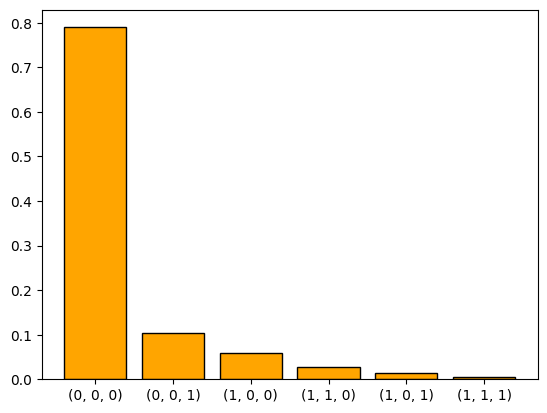

In [246]:
plt.bar(prob_df['Исход'], prob_df['Вероятность'], color = 'orange', edgecolor = 'black')

plt.show()

# Общие тенденции

В данном сценарии прослеживаются несколько тенденций. Во-первых, высокий уровень игнорирования среди сотрудников. Вероятность такого исхода зачастую достигает 0.8+. Эта наиболее распространенная реакция среди сотрудников. Так же видно, что из тех, кто все таки перешел по ссылке, половина свои данные не ввела. Наиболее уязвимыми к варианту простого перехода по ссылке среди сотрудников, чья численность >= 5, оказались: Управляющий директор-начальник отдела, Старший руководитель проектов, Бизнес-партнер по управлению персоналом. Вероятность исхода 1, 1, 0, то есть перехода и ввода, как отмечалось ранее, ниже в 2 раза. Варианты 1, 0, 1 и 1, 1, 1 имеют не низкую, по сравнению с остальными вероятность наступления. Хороший исход 0, 0, 1 занимает половину от активной части, то есть среди всех вариантов, кроме 0, 0, 0. Но в общей массе, только 10% сотрудников пошли по пути 0, 0, 1. Так же, из распределения по группам видно, что большая часть сотрудников имеет шанс  < 0.5 попасться на фишинг, а в ряде вариантов и < 0.25. Среди блоков отдельно выделилась группа Риски. Там высокие показатели по исходу 0, 0, 1. Так же они наименее подвержены самым плохим вариантам: 1, 0, 0 и 1, 1, 0.